In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df=pd.read_csv(r"extracted_files/salary.csv",low_memory=False)
df.head(3)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN


In [5]:
df.drop(columns=['duplicated','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1,inplace=True)

## THE LAST 5 COLUMNS HAVE 99% MISSING VALUES AND WILL NOT CONTRIBUTE TO MODEL PREDICTION

In [6]:
df.isnull().sum()

AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
MI              0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64

In [7]:
df.drop(columns=['FIRST NAME','LAST NAME','MI'],axis=1,inplace=True)

In [8]:
# df.drop(columns=['ETHNICITY','GENDER'],axis=1,inplace=True)
df.head(1)

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.9615,29.0,9545.82,114549.84,127717


In [9]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv')  # If loading from a CSV file

# Define the function to get categorical feature names
def cat_names():
    return df.select_dtypes(include=['object']).columns

# Perform target encoding on each categorical feature
for feature in cat_names():
    # Calculate the mean 'ANNUAL' value for each unique value in the categorical feature
    agency_mean = df.groupby(feature)['ANNUAL'].mean()
    
    # Map the calculated mean values to the original DataFrame
    df[feature + '_target_encoded'] = df[feature].map(agency_mean)

# Display the updated DataFrame
df.head()


,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,AGENCY NAME_target_encoded,CLASS CODE_target_encoded,CLASS TITLE_target_encoded,ETHNICITY_target_encoded,GENDER_target_encoded,STATUS_target_encoded,EMPLOY DATE_target_encoded
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,138298.202091,114616.191852,114616.191852,56057.932803,54458.685961,67191.242021,114549.840000
1,212,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,81563.307970,139388.706383,139388.706383,56057.932803,54458.685961,19351.093333,55708.989836
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,138298.202091,114616.191852,114616.191852,56057.932803,54458.685961,67191.242021,43163.729648
3,212,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,81563.307970,139388.706383,139388.706383,56057.932803,54458.685961,19351.093333,47458.126797
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,41157.350070,38917.049116,38917.049116,47210.593195,47898.965053,50076.064007,40075.703820


In [10]:
df.drop(columns=['AGENCY NAME','CLASS CODE','CLASS TITLE','STATUS'],axis=True,inplace=True)

### ETHNICITY AND GENDER MAYNOT BE A GOOD PREDICTOR OF SALARY

In [11]:
df.drop(columns=['ETHNICITY','GENDER'],axis=1,inplace=True)

In [12]:
df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE'], format='%m/%d/%y')

# Extract the year from the 'EMPLOY DATE' column
df['EMPLOY YEAR'] = df['EMPLOY DATE'].dt.year
df.head(2)
df.drop(columns=['CLASS CODE_target_encoded'],axis=1)

,AGENCY,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,AGENCY NAME_target_encoded,CLASS TITLE_target_encoded,ETHNICITY_target_encoded,GENDER_target_encoded,STATUS_target_encoded,EMPLOY DATE_target_encoded,EMPLOY YEAR
0,241,1988-02-18,75.96150,29.0,9545.82,114549.84,127717,138298.202091,114616.191852,56057.932803,54458.685961,67191.242021,114549.840000,1988
1,212,2015-02-01,81.04454,4.0,1404.77,16857.24,127717,81563.307970,139388.706383,56057.932803,54458.685961,19351.093333,55708.989836,2015
2,241,2020-02-01,75.96150,29.0,9545.82,114549.84,59115,138298.202091,114616.191852,56057.932803,54458.685961,67191.242021,43163.729648,2020
3,212,2018-09-01,81.04453,4.0,1404.77,16857.24,59115,81563.307970,139388.706383,56057.932803,54458.685961,19351.093333,47458.126797,2018
4,696,2020-06-29,0.00000,40.0,3284.27,39411.24,165030,41157.350070,38917.049116,47210.593195,47898.965053,50076.064007,40075.703820,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,2017-10-30,0.00000,40.0,2899.00,34788.00,770781,40858.390588,30184.281351,56057.932803,54458.685961,50076.064007,44946.823404,2017
149477,809,2015-07-13,0.00000,40.0,5500.00,66000.00,847431,40858.390588,64704.675000,56057.932803,47898.965053,50076.064007,52576.981667,2015
149478,809,2012-10-15,12.93000,20.0,1120.60,13447.20,34266,40858.390588,23160.302986,56057.932803,54458.685961,23939.806871,58605.706849,2012
149479,809,1989-09-22,0.00000,40.0,5744.16,68929.92,123490,40858.390588,51467.771423,56057.932803,54458.685961,50076.064007,68929.920000,1989


In [13]:
# df.drop(columns=['MONTHLY'],axis=1,inplace=True)
x_train = df.drop(columns=["ANNUAL"],axis=1)
y_train=df["ANNUAL"]
print(x_train.columns)

Index(['AGENCY', 'EMPLOY DATE', 'HRLY RATE', 'HRS PER WK', 'MONTHLY',
       'STATE NUMBER', 'AGENCY NAME_target_encoded',
       'CLASS CODE_target_encoded', 'CLASS TITLE_target_encoded',
       'ETHNICITY_target_encoded', 'GENDER_target_encoded',
       'STATUS_target_encoded', 'EMPLOY DATE_target_encoded', 'EMPLOY YEAR'],
      dtype='object')


In [14]:
x_train.drop(columns='EMPLOY DATE',axis=1,inplace=True)

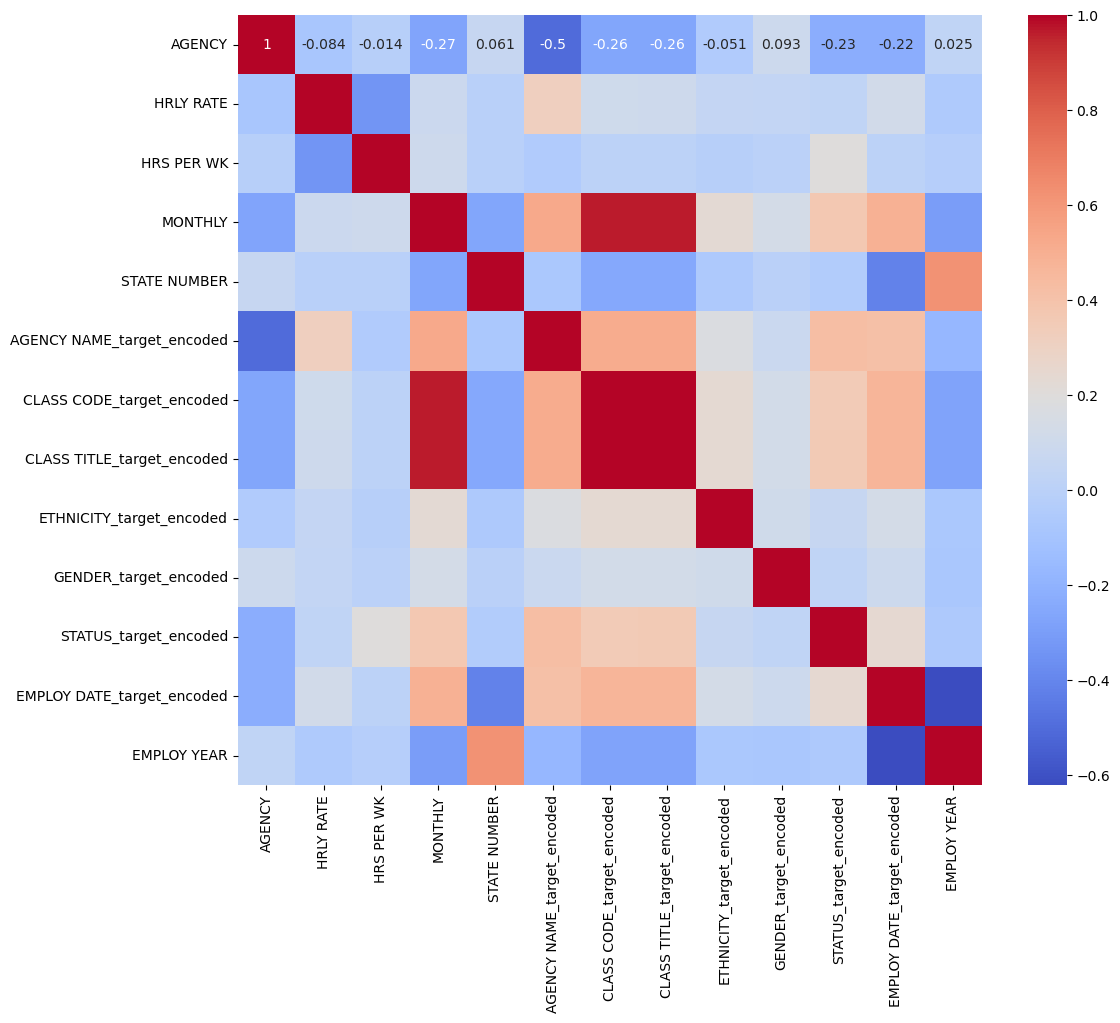

In [15]:
# Compute the correlation matrix
correlation_matrix = x_train.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


** THE CORRELATION MATRIX SHOW THAT THE RELATIONSHIP BETWEEN DEPENDENT VARIABLES ARE NOT SIGNIFICANT ENOUGH TO DROP COLUMNS**

In [16]:
x_train.head(2)

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,STATE NUMBER,AGENCY NAME_target_encoded,CLASS CODE_target_encoded,CLASS TITLE_target_encoded,ETHNICITY_target_encoded,GENDER_target_encoded,STATUS_target_encoded,EMPLOY DATE_target_encoded,EMPLOY YEAR
0,241,75.96150,29.0,9545.82,127717,138298.202091,114616.191852,114616.191852,56057.932803,54458.685961,67191.242021,114549.840000,1988
1,212,81.04454,4.0,1404.77,127717,81563.307970,139388.706383,139388.706383,56057.932803,54458.685961,19351.093333,55708.989836,2015


In [17]:
non_numeric_cols = x_train.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


In [18]:
def correlation(df,threshold):
    corrcols=set()
    cor=x_train.corr()
    for i in range(len(cor.columns)):
        for j in range(i):
            if abs(cor.iloc[i,j])>threshold:
                colname=cor.columns[i]
                corrcols.add(colname)
    return corrcols

In [19]:
correlation(x_train,0.90)

{'CLASS CODE_target_encoded', 'CLASS TITLE_target_encoded'}

In [20]:
x_train.head(2)

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,STATE NUMBER,AGENCY NAME_target_encoded,CLASS CODE_target_encoded,CLASS TITLE_target_encoded,ETHNICITY_target_encoded,GENDER_target_encoded,STATUS_target_encoded,EMPLOY DATE_target_encoded,EMPLOY YEAR
0,241,75.96150,29.0,9545.82,127717,138298.202091,114616.191852,114616.191852,56057.932803,54458.685961,67191.242021,114549.840000,1988
1,212,81.04454,4.0,1404.77,127717,81563.307970,139388.706383,139388.706383,56057.932803,54458.685961,19351.093333,55708.989836,2015


In [21]:
x_train.drop(columns=["MONTHLY",'CLASS CODE_target_encoded','ETHNICITY_target_encoded','GENDER_target_encoded',"EMPLOY DATE_target_encoded"],axis=1,inplace=True)

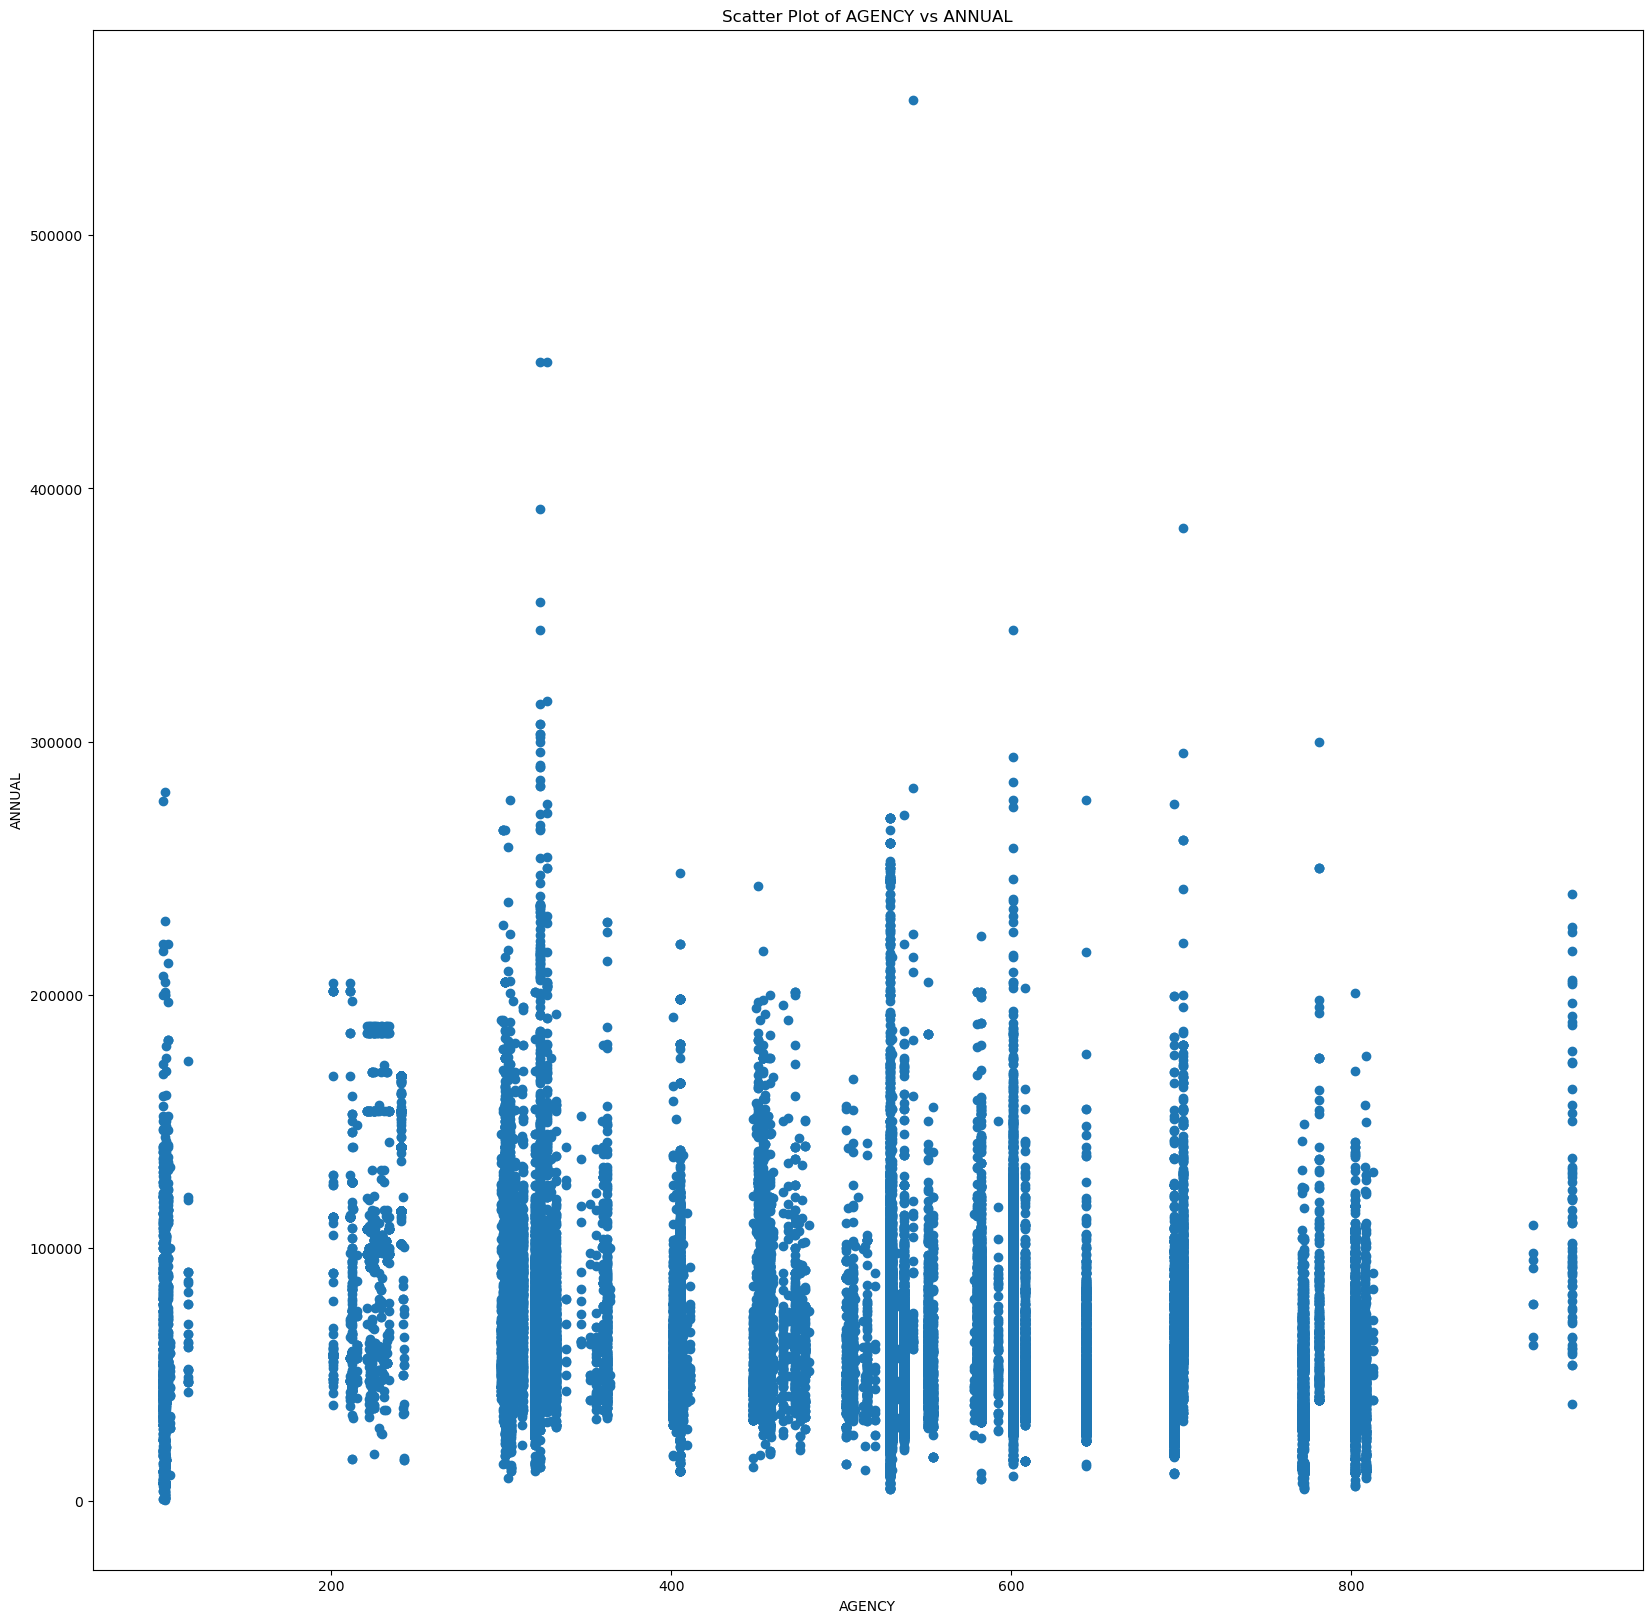

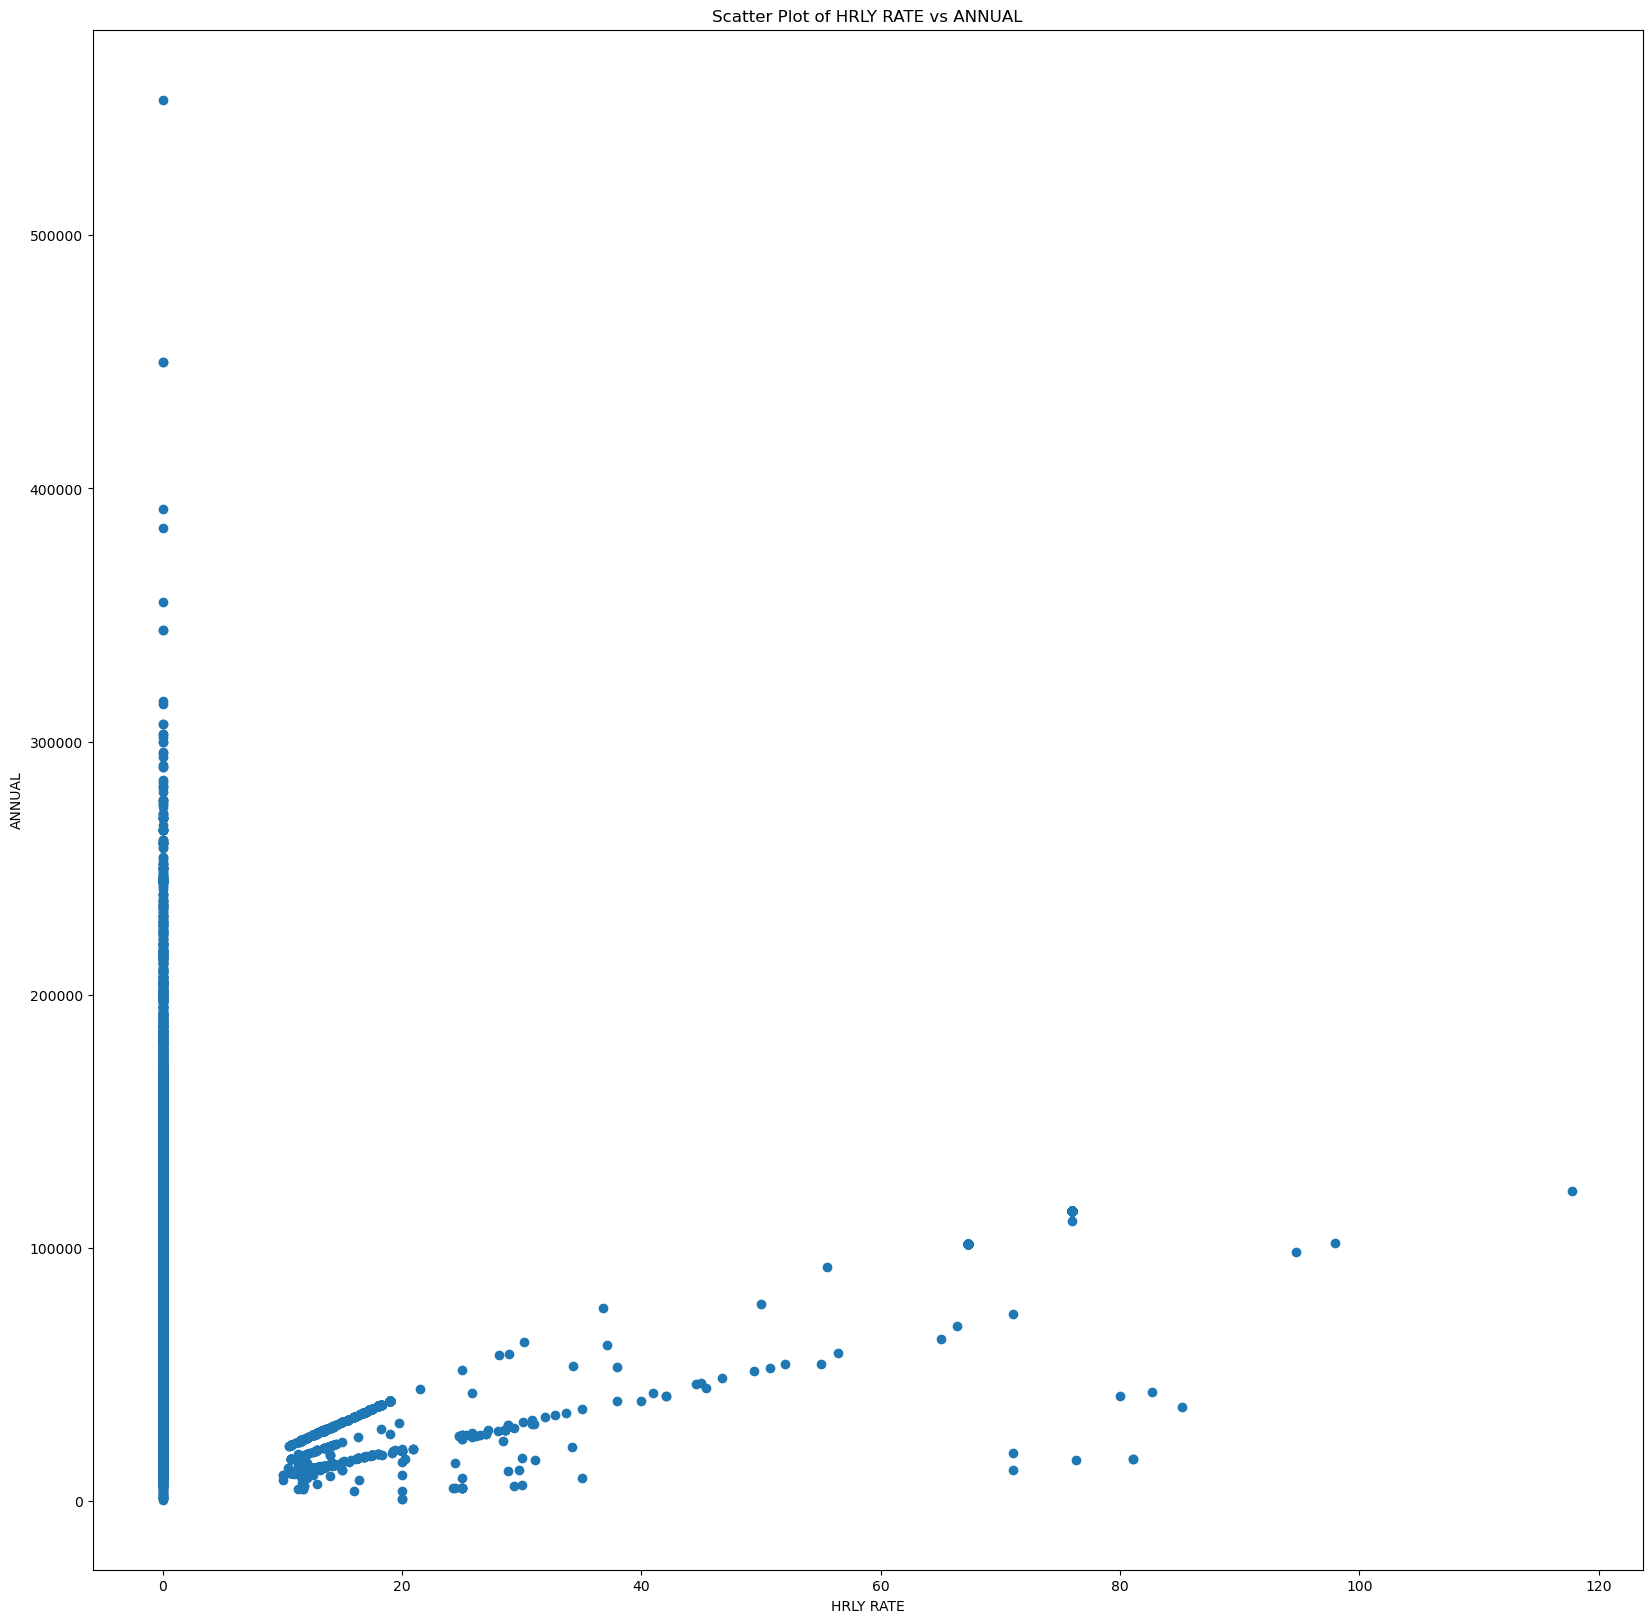

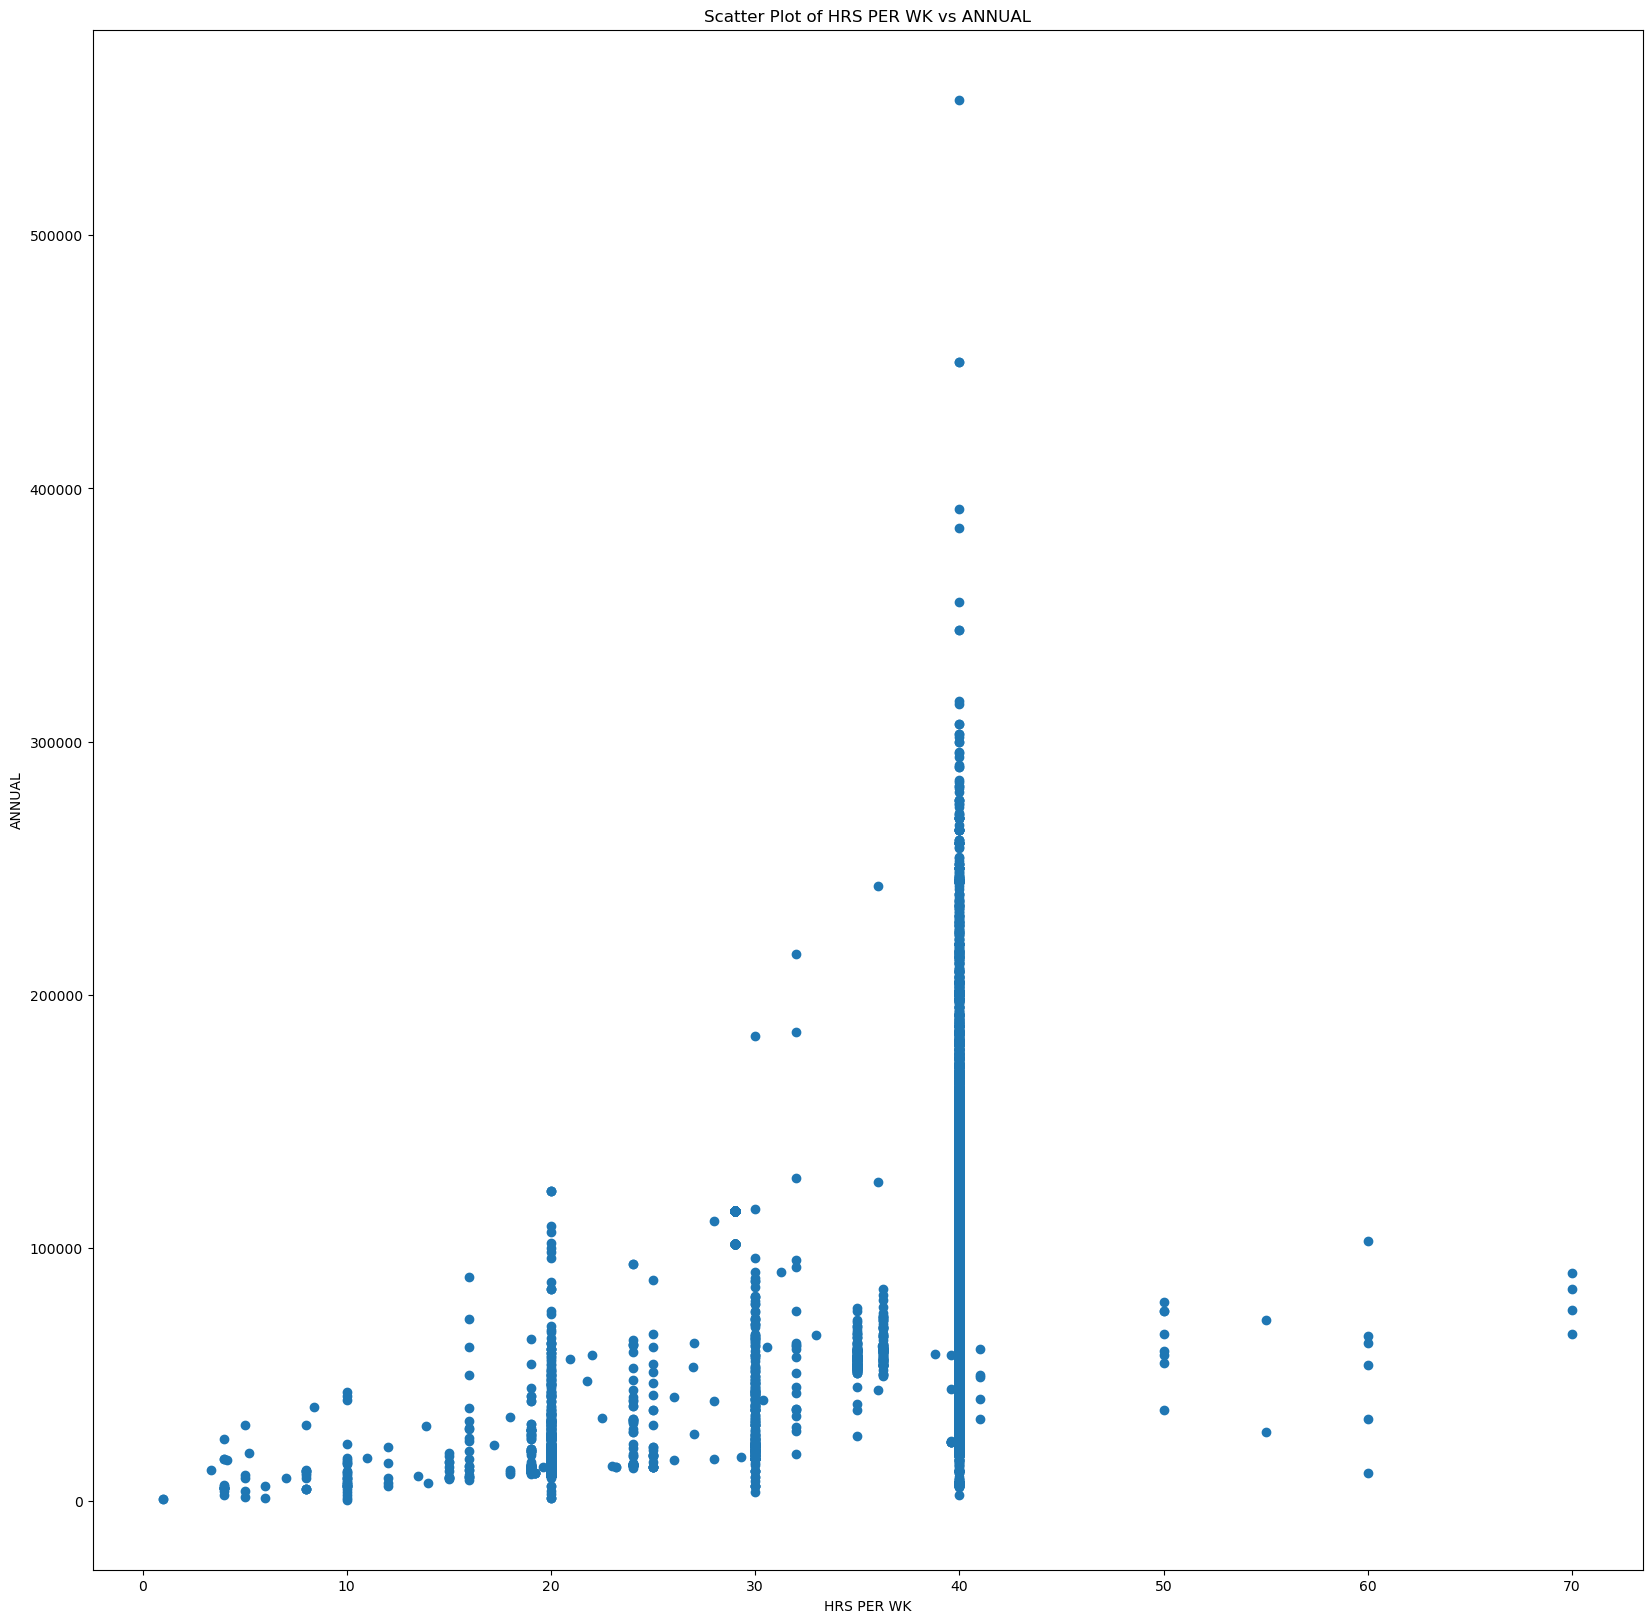

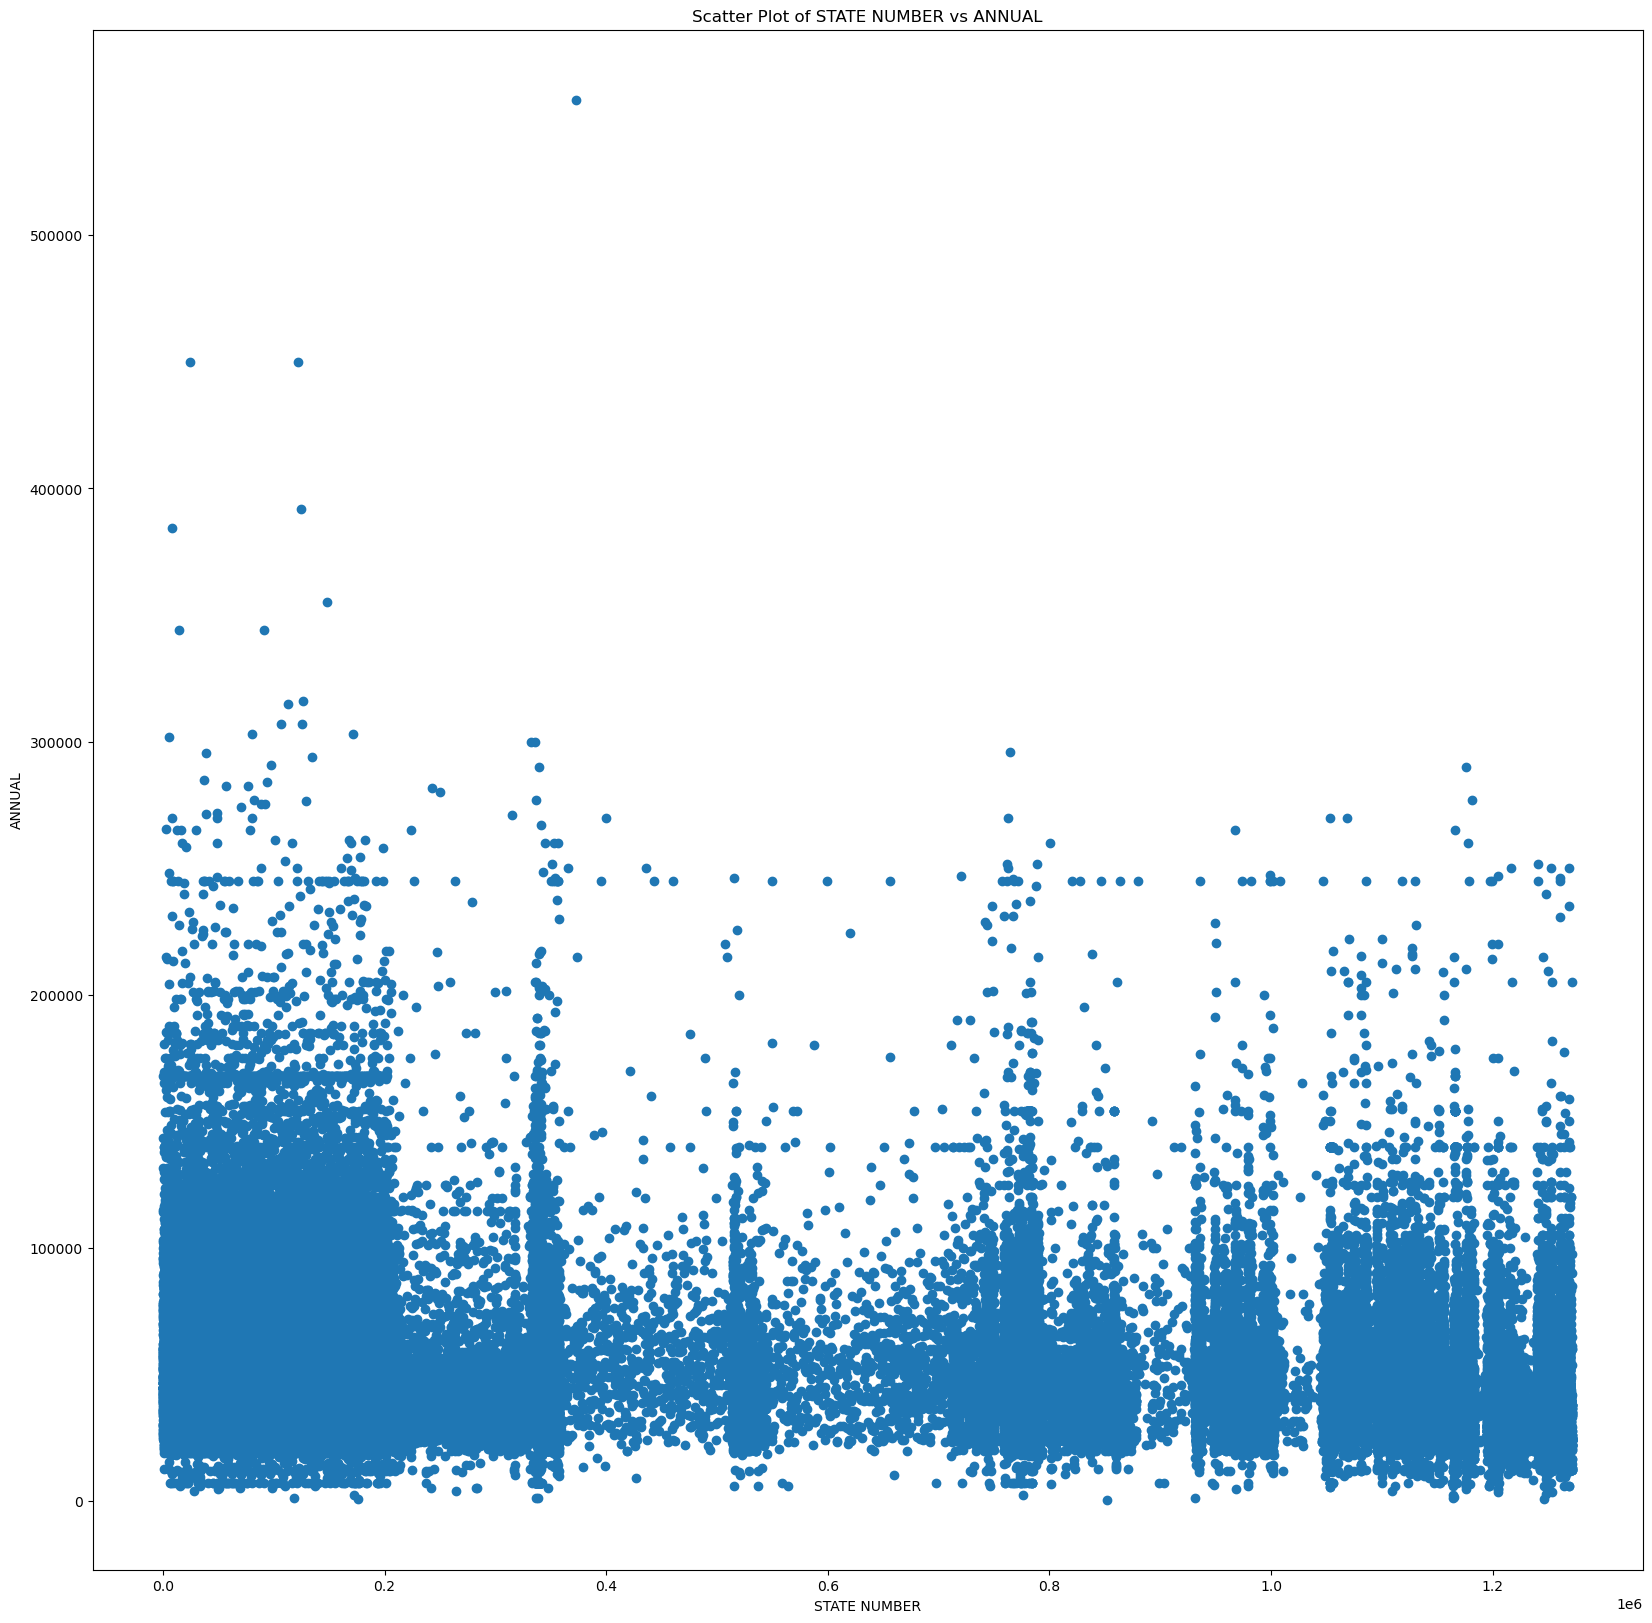

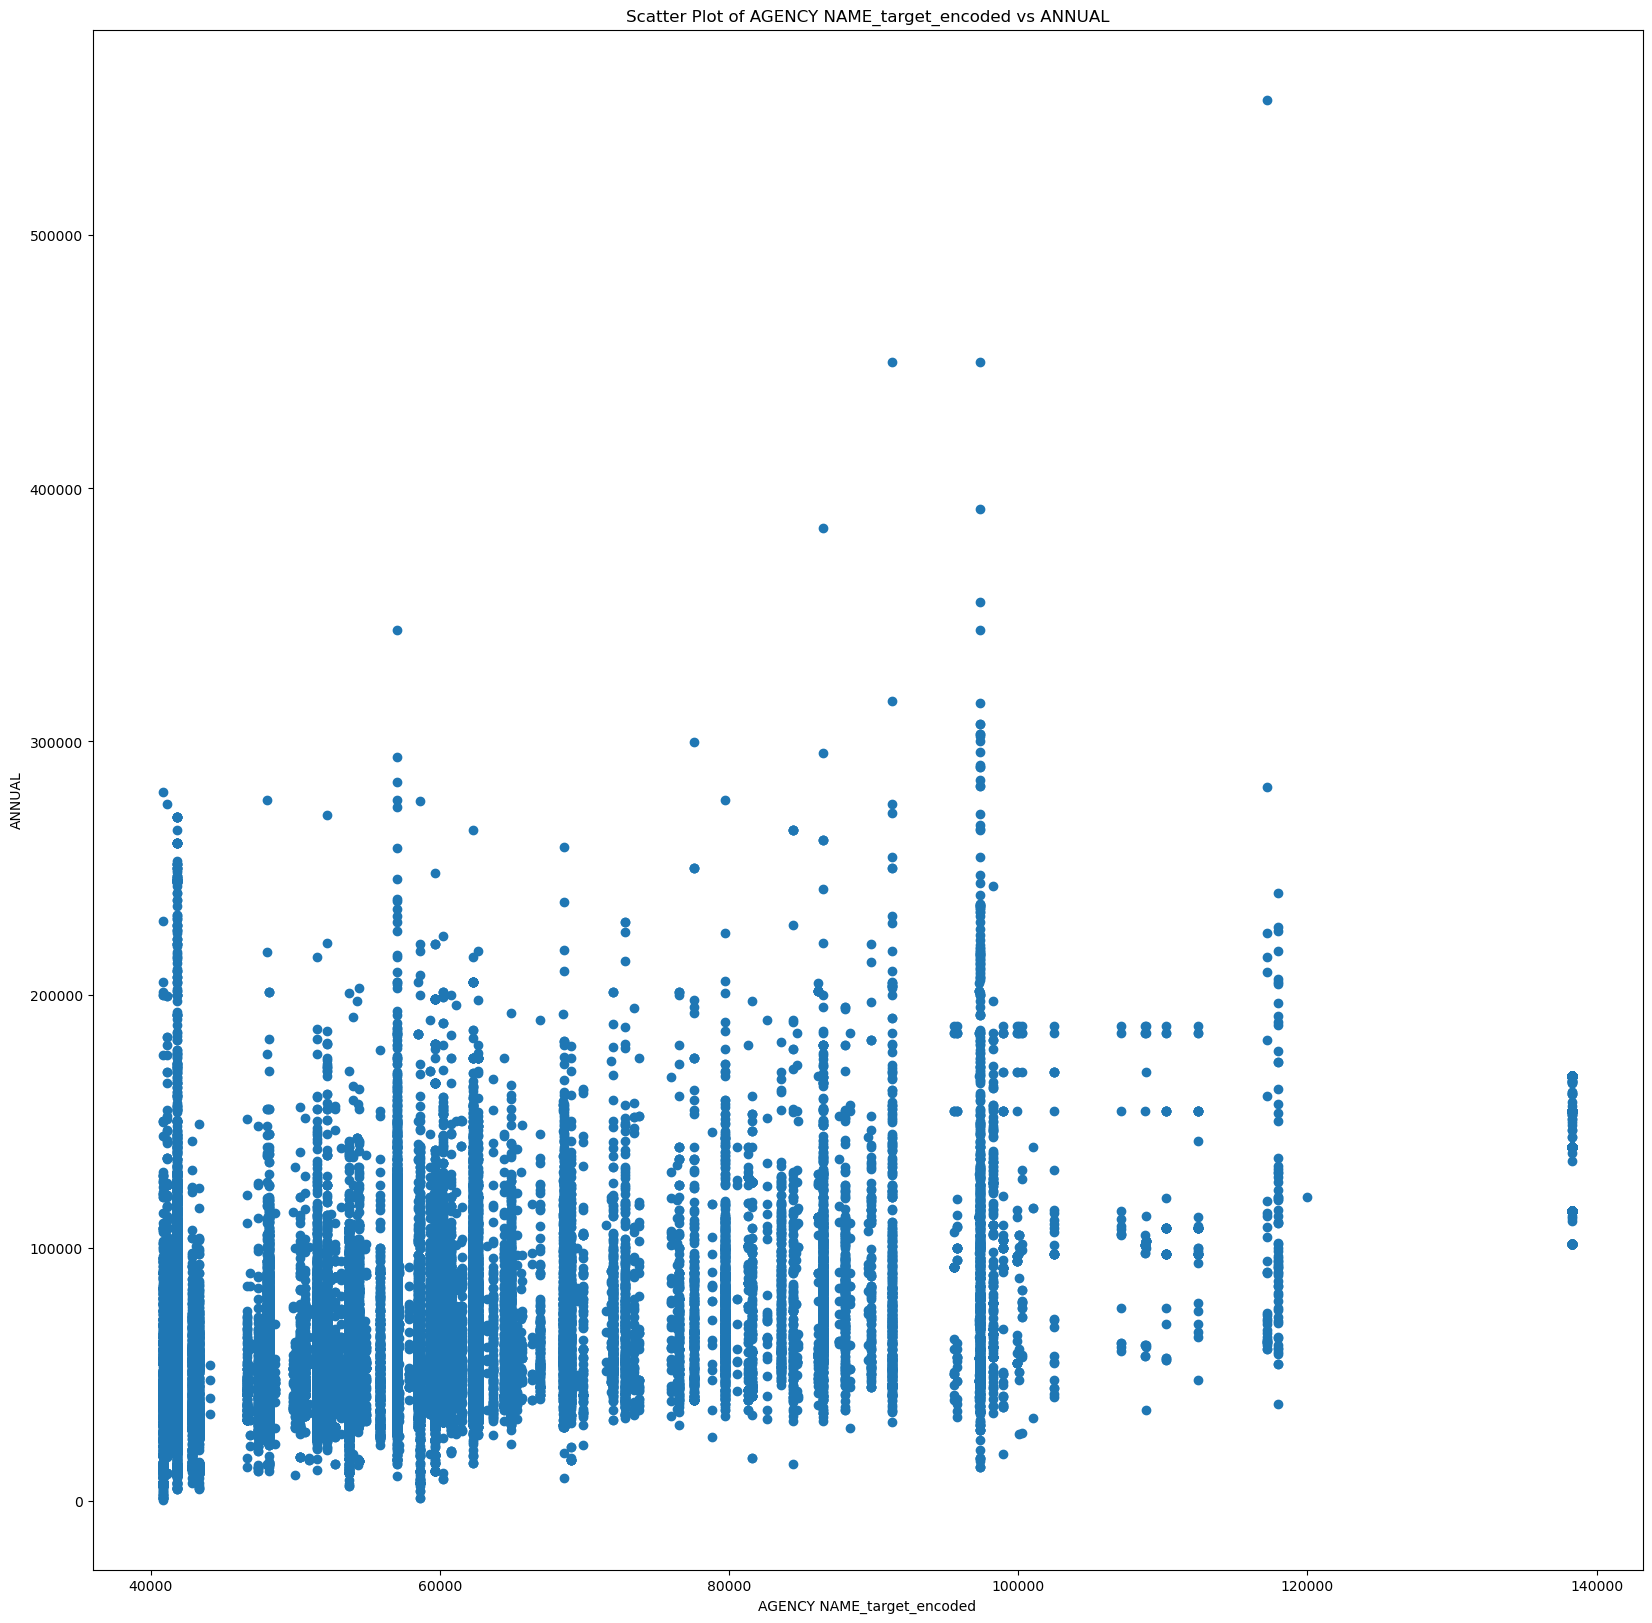

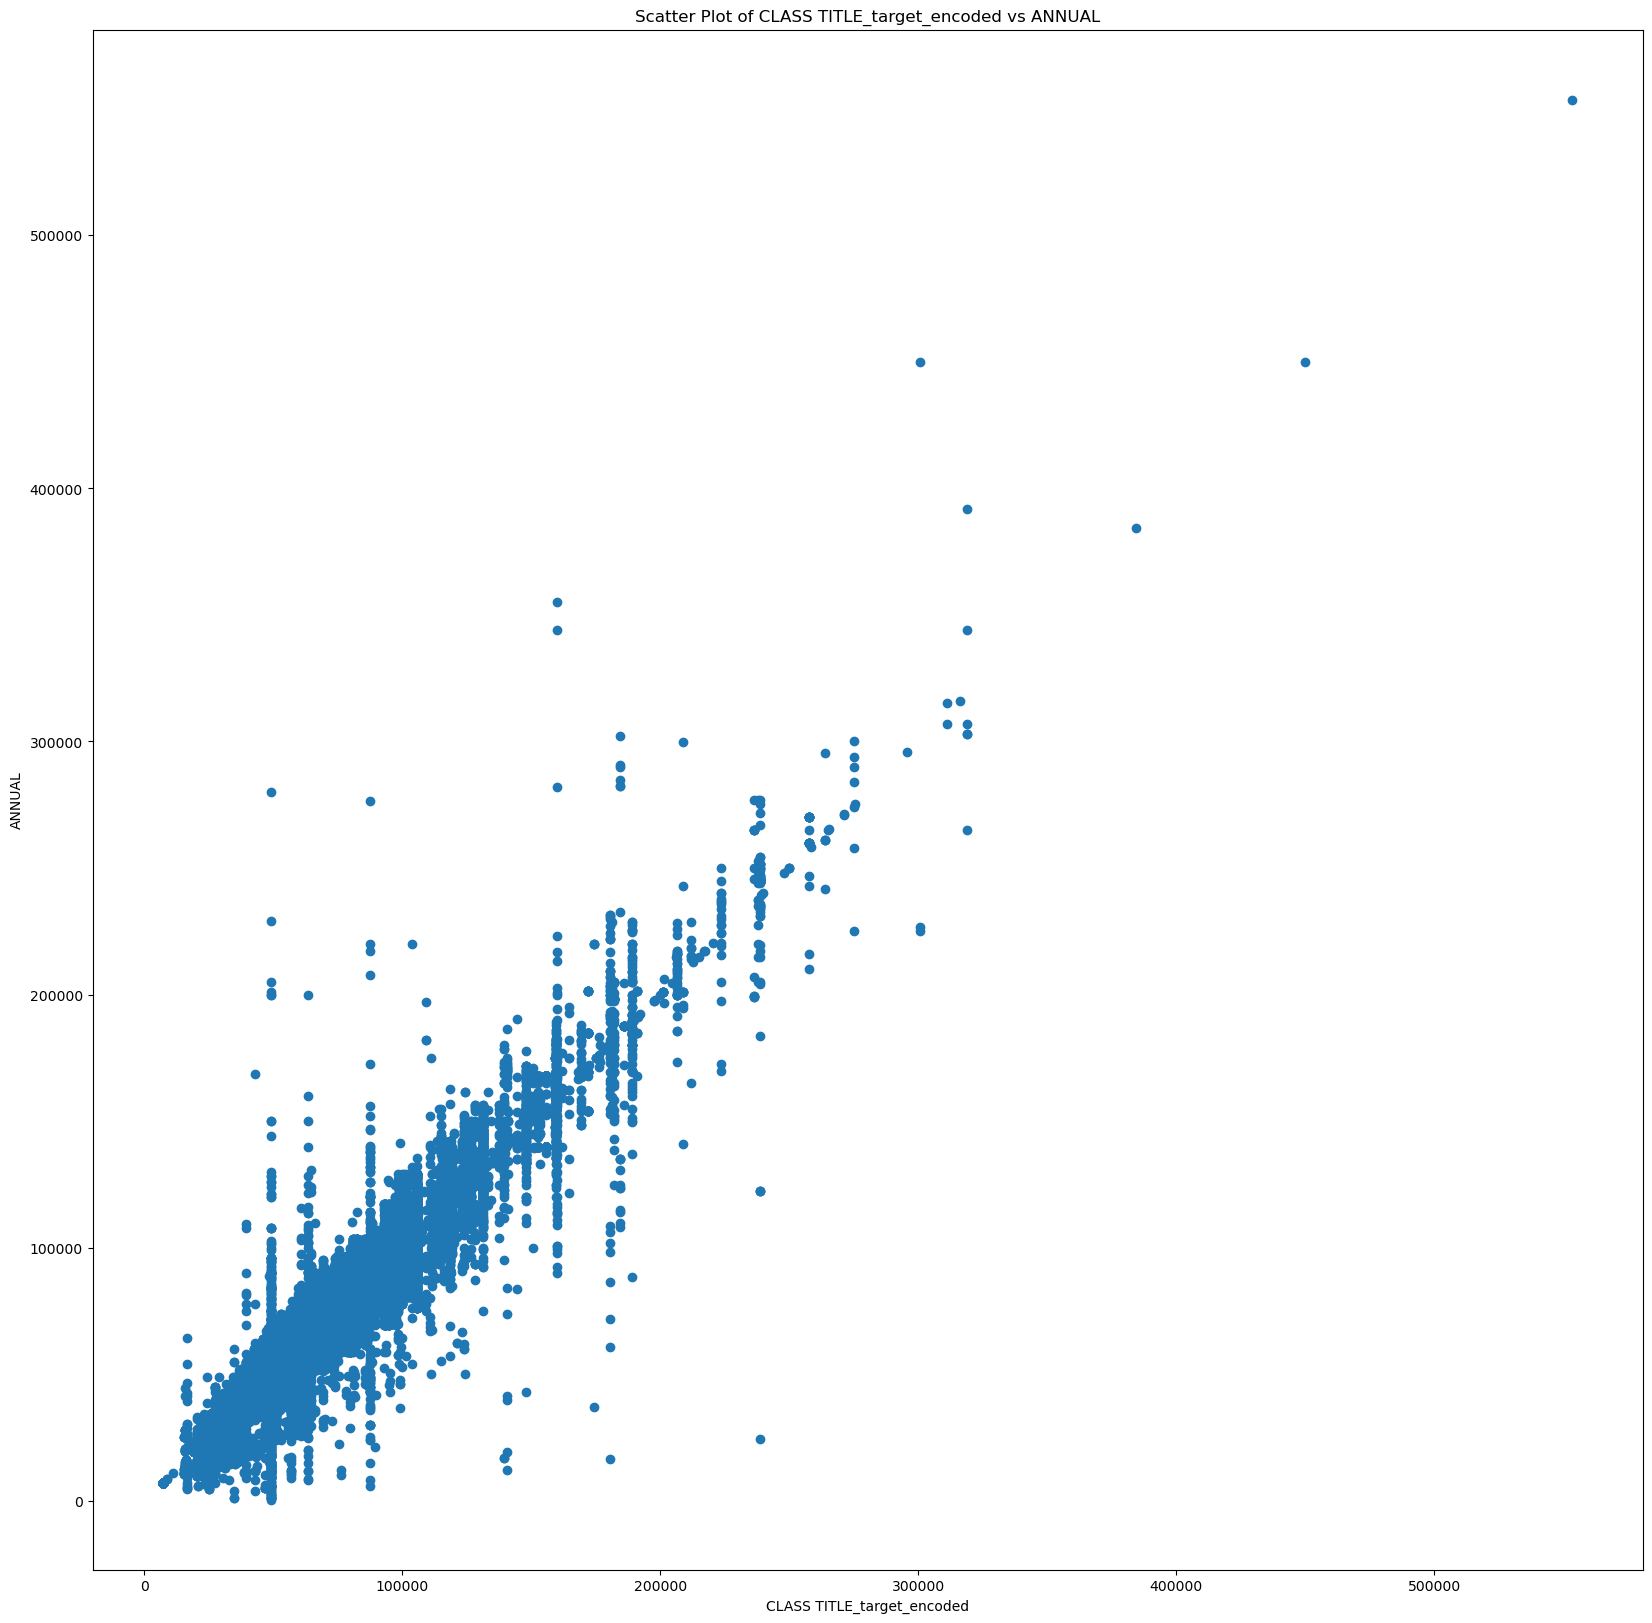

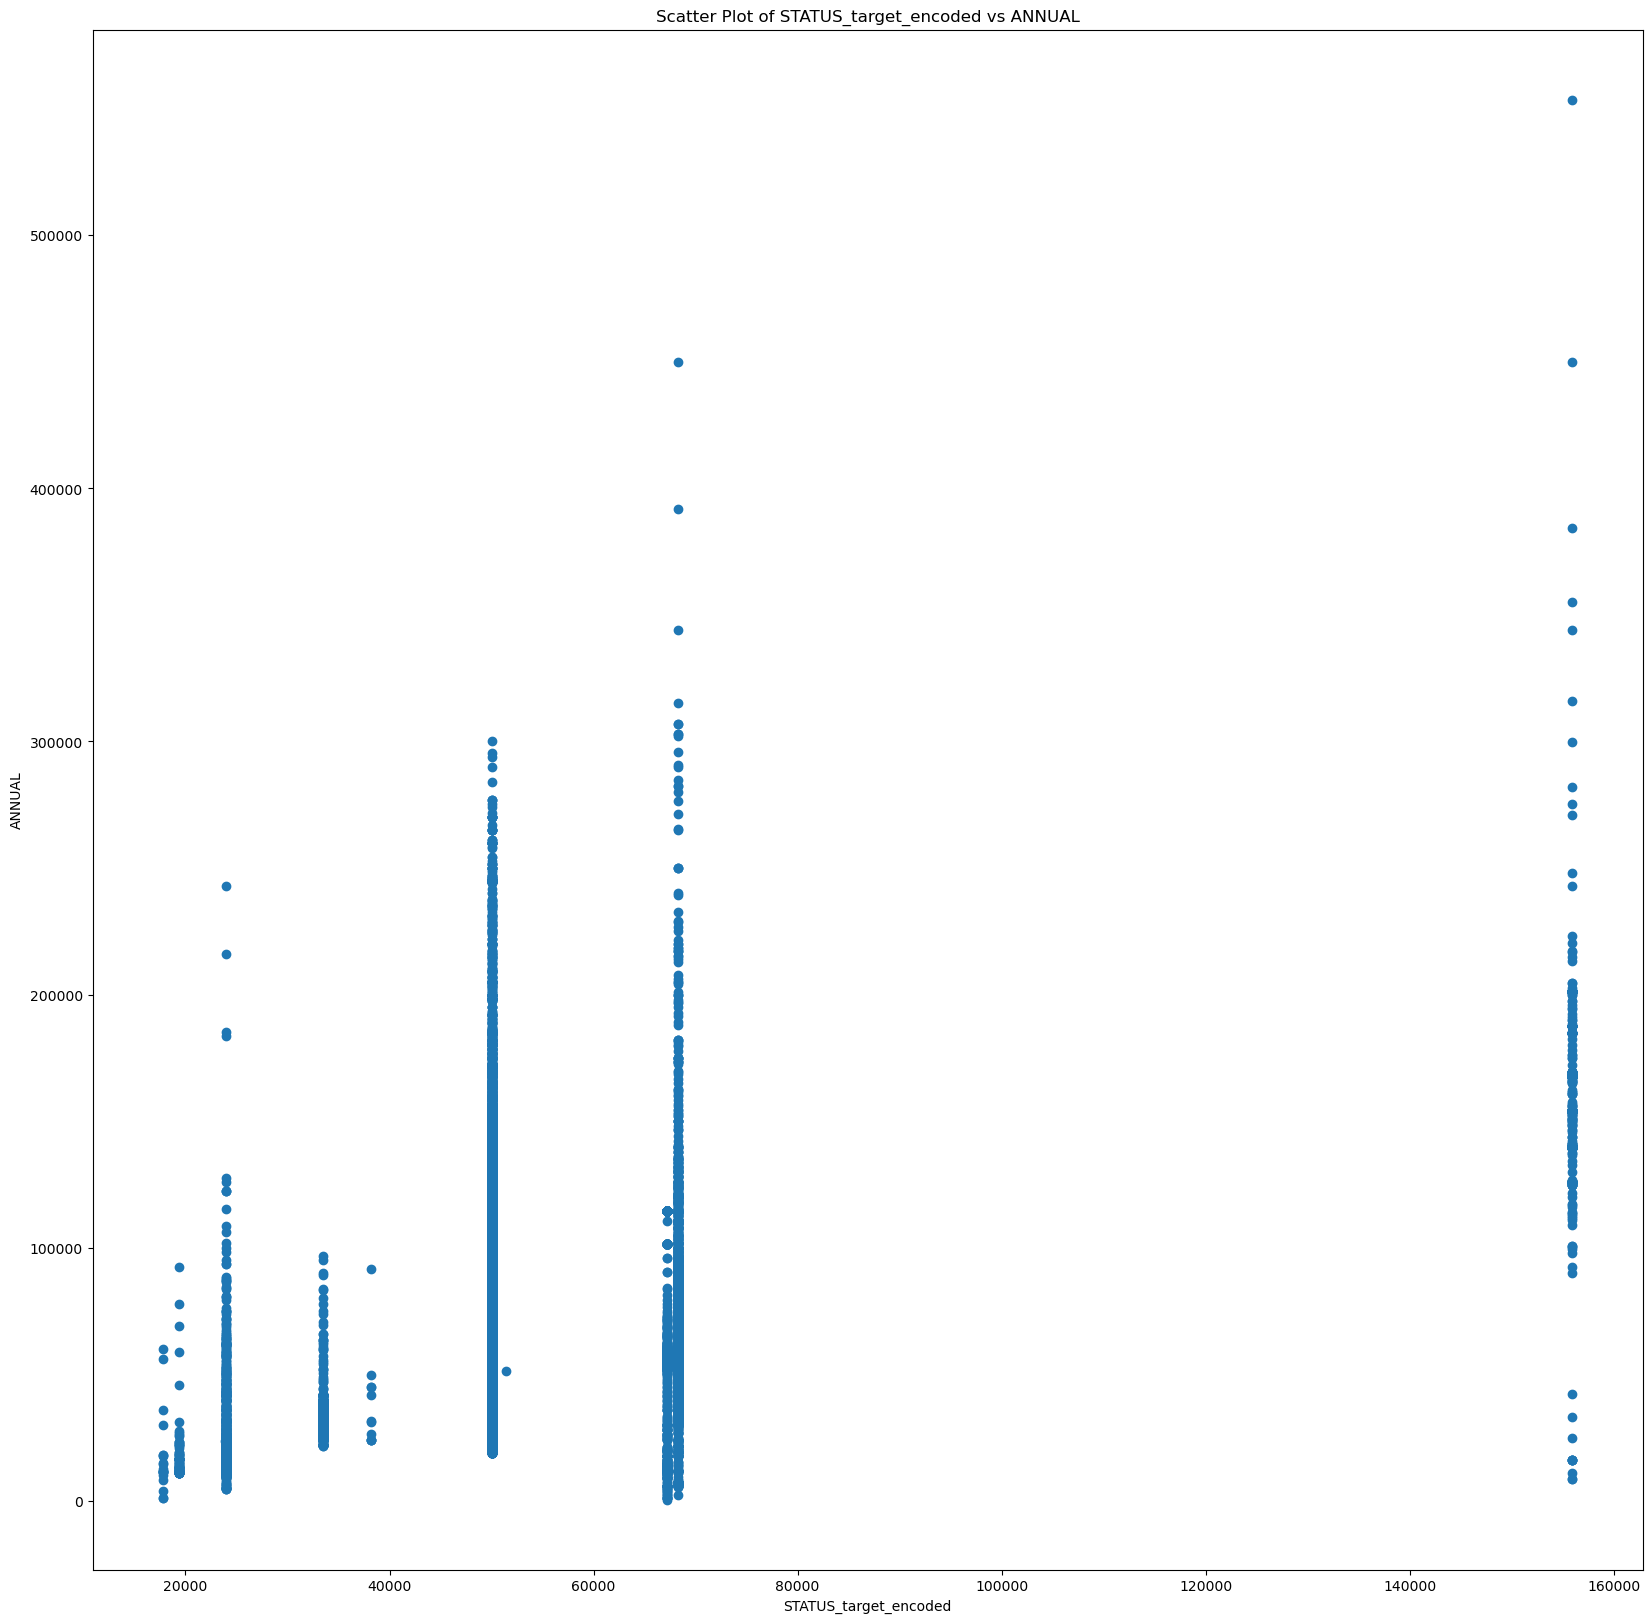

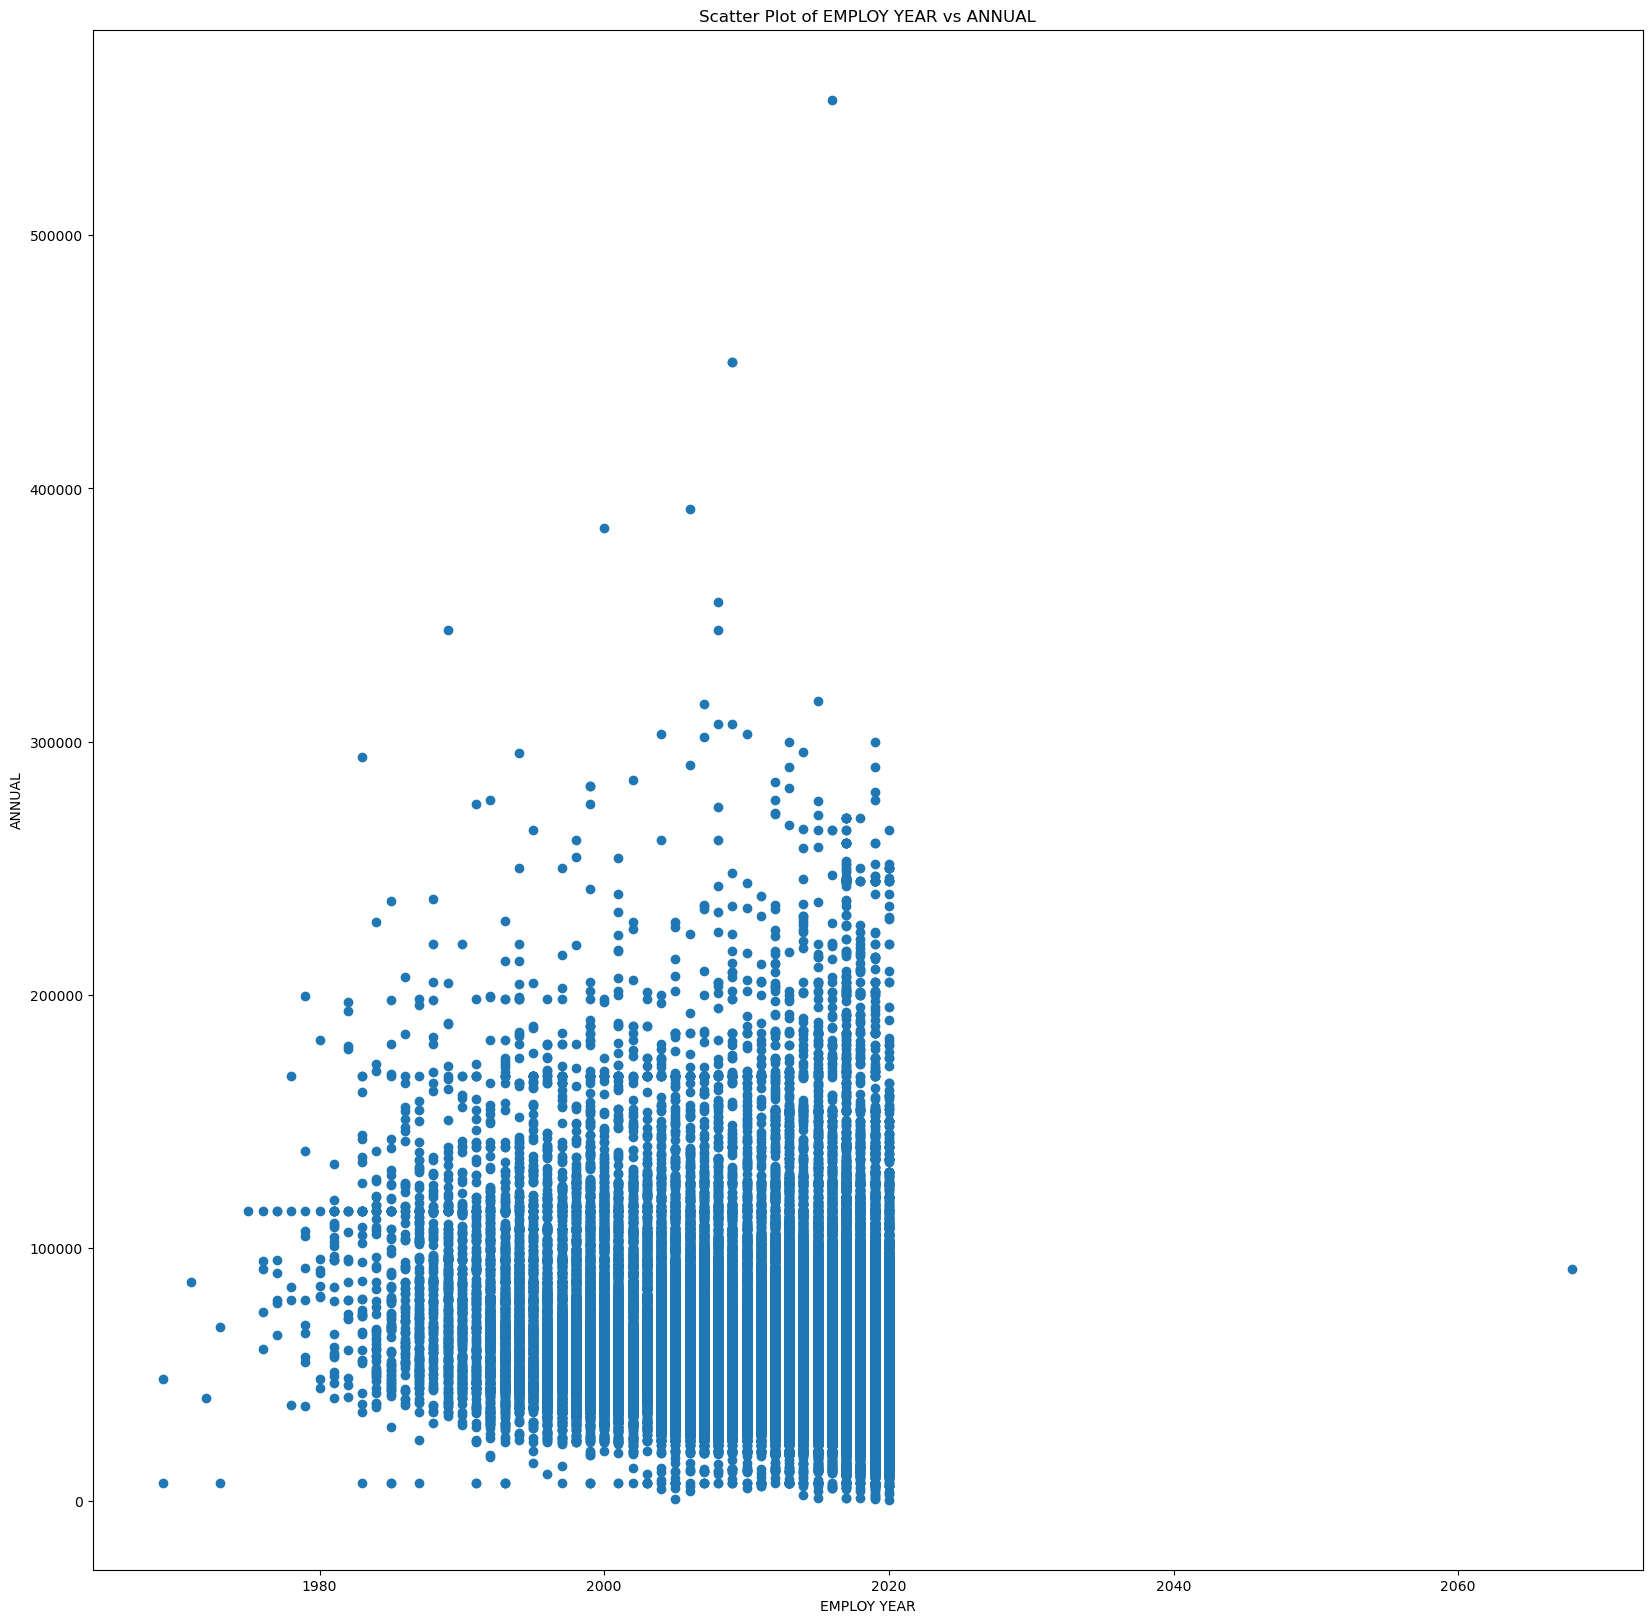

In [22]:
for feature in x_train:
    plt.figure(figsize=(20, 20))
    plt.scatter(x=x_train[feature], y=y_train)
    plt.xlabel(feature)
    plt.ylabel('ANNUAL')
    plt.title(f'Scatter Plot of {feature} vs ANNUAL')
    plt.show()

In [23]:
for feature in x_train.columns:
    pro=df[feature].describe()
    print(f"{feature}:\n{pro}\n")

AGENCY:
count    149481.000000
mean        545.736288
std         139.057691
min         101.000000
25%         529.000000
50%         530.000000
75%         696.000000
max         930.000000
Name: AGENCY, dtype: float64

HRLY RATE:
count    149481.000000
mean          0.346488
std           4.211485
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         117.788480
Name: HRLY RATE, dtype: float64

HRS PER WK:
count    149481.000000
mean         39.714918
std           2.323855
min           1.000000
25%          40.000000
50%          40.000000
75%          40.000000
max          70.000000
Name: HRS PER WK, dtype: float64

STATE NUMBER:
count    1.494810e+05
mean     5.651930e+05
std      4.786212e+05
min      1.000000e+00
25%      1.133340e+05
50%      3.463730e+05
75%      1.100500e+06
max      1.271604e+06
Name: STATE NUMBER, dtype: float64

AGENCY NAME_target_encoded:
count    149481.000000
mean      50714.210973
std       13334.1409

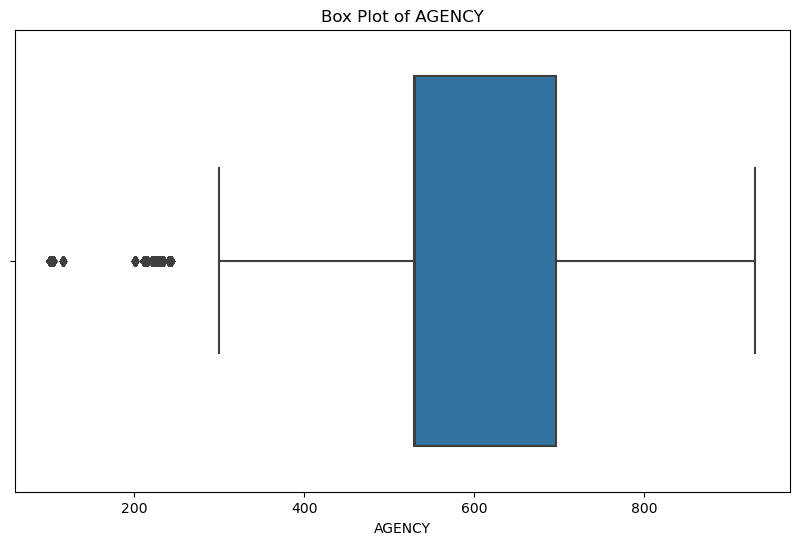

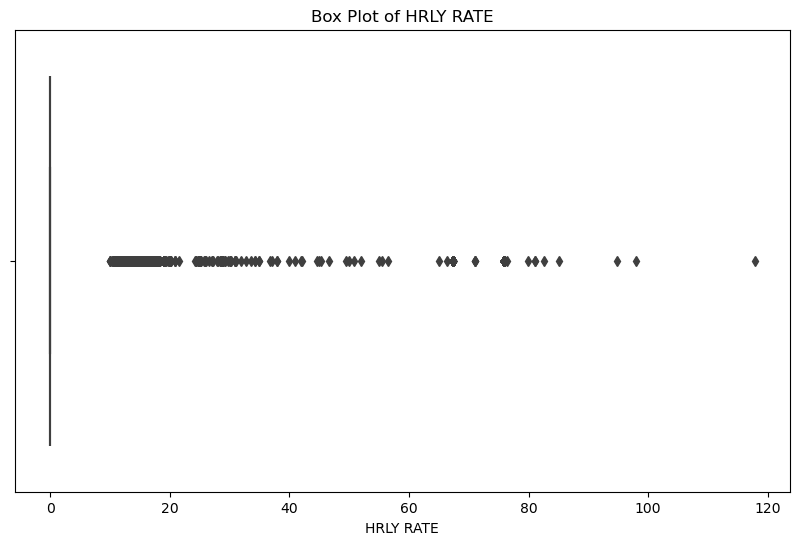

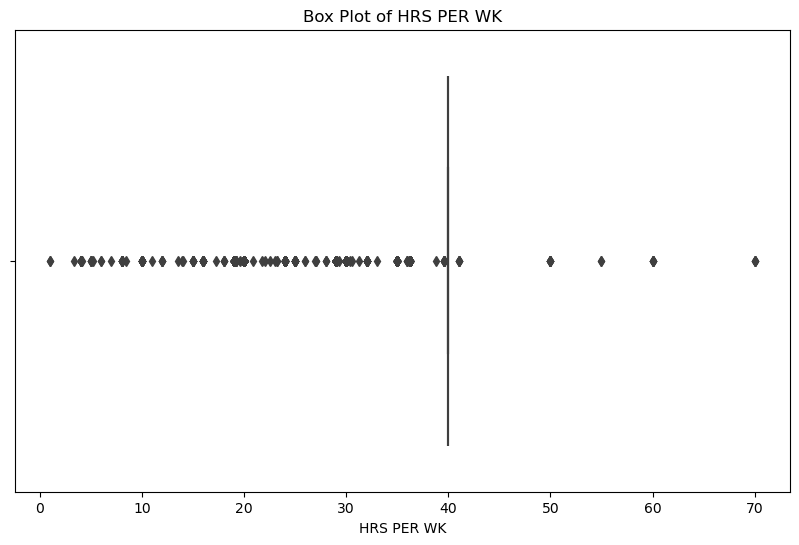

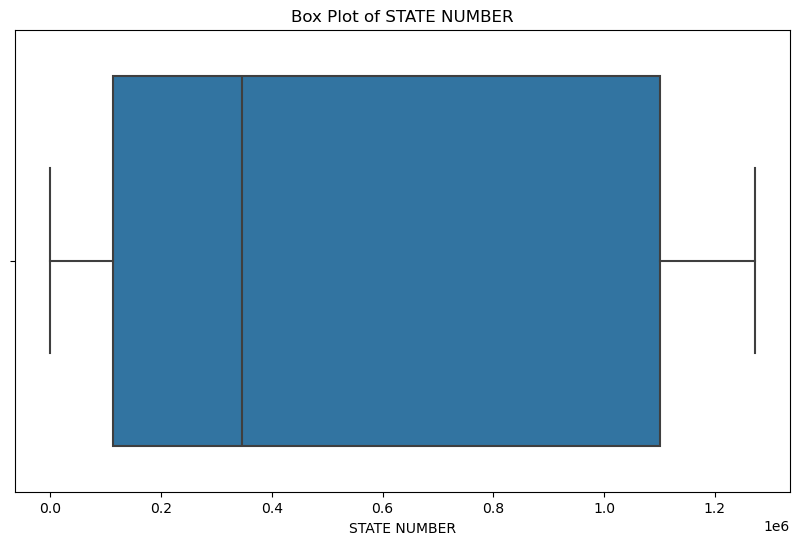

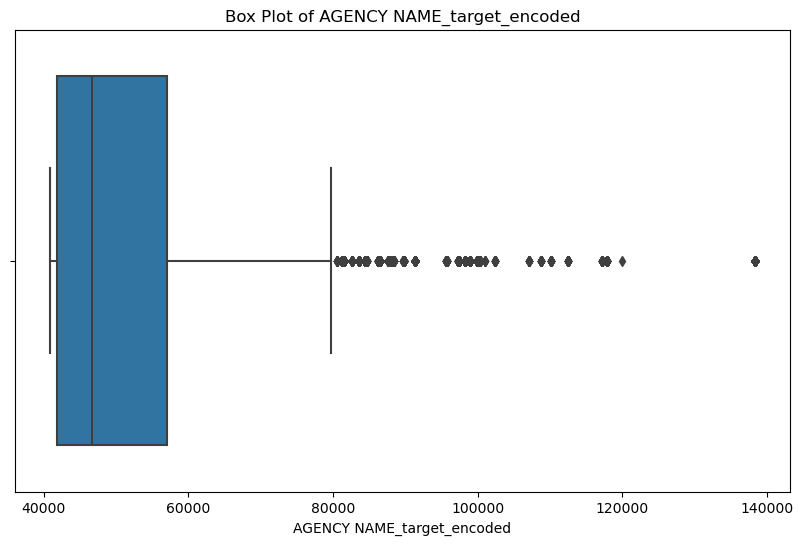

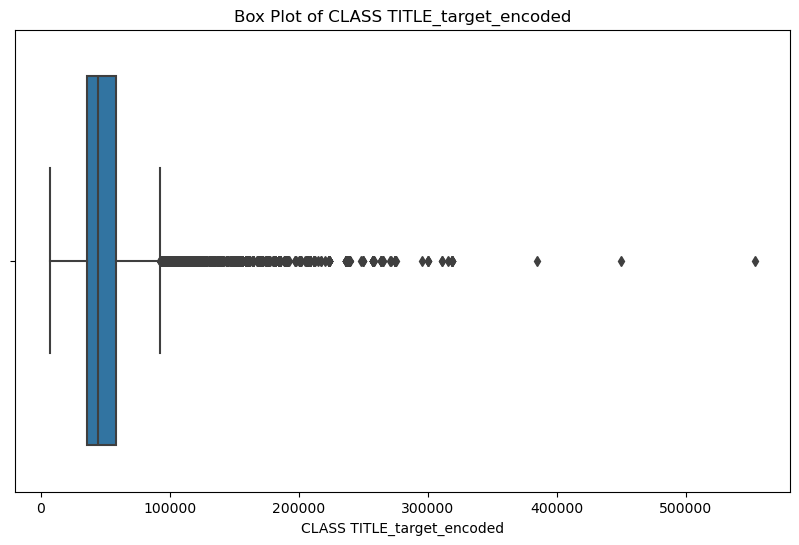

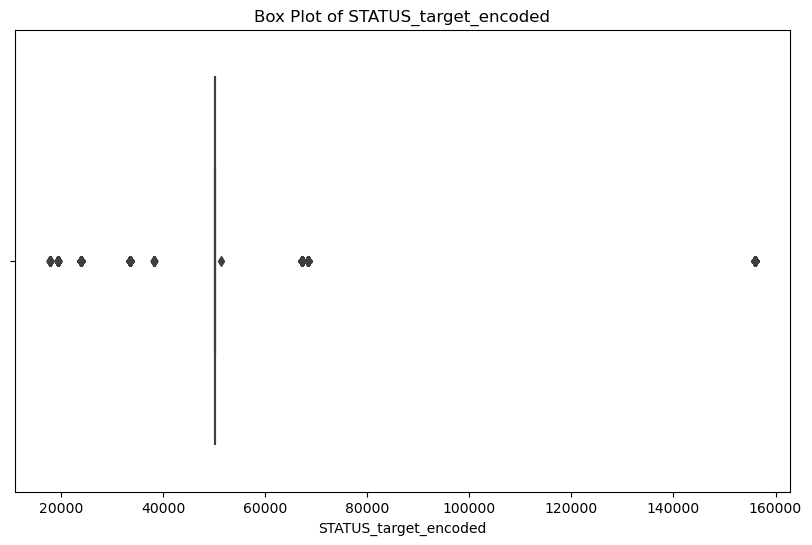

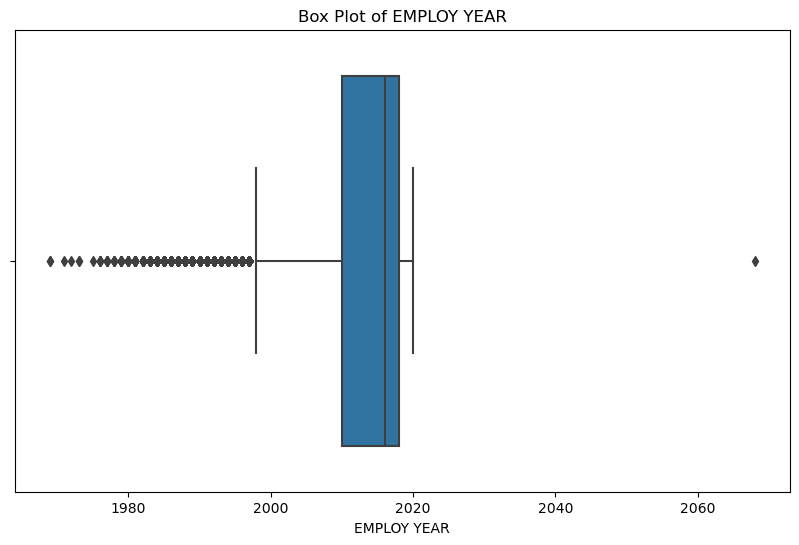

In [24]:
for feature in x_train.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=x_train, x=feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [27]:
def detect_outliers(df):
    for feature in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        print(f"{feature}:")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Number of outliers: {len(outliers)}")
        print(outliers[[feature]].describe())
        print("\n")

# Apply the function to your DataFrame
detect_outliers(x_train_cleaned)


AGENCY:
Lower Bound: 278.5, Upper Bound: 946.5
Number of outliers: 0
       AGENCY
count     0.0
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN


HRLY RATE:
Lower Bound: 0.0, Upper Bound: 0.0
Number of outliers: 0
       HRLY RATE
count        0.0
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN


HRS PER WK:
Lower Bound: 40.0, Upper Bound: 40.0
Number of outliers: 0
       HRS PER WK
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


MONTHLY:
Lower Bound: 804.3899999999999, Upper Bound: 6712.23
Number of outliers: 4083
           MONTHLY
count  4083.000000
mean   7269.195356
std     435.980999
min    6712.350000
25%    6941.460000
50%    7168.900000
75%    7519.245000
max    8917.000000


ANNUAL:
Lower Bound: 9652.680000000004, Upper Bound: 80546.76
Number of outliers: 408

In [26]:
import pandas as pd
import numpy as np

def remove_outliers(x_train):
    # Create an initial mask where all values are True
    mask = pd.Series([True] * len(x_train), index=x_train.index)
    
    # Process each numeric feature to update the mask
    for feature in x_train.select_dtypes(include=[np.number]).columns:
        Q1 = x_train[feature].quantile(0.25)
        Q3 = x_train[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Update the mask to filter out outliers for the current feature
        mask &= (x_train[feature]>=lower_bound) & (x_train[feature]<=upper_bound)
    
    # Apply the mask to filter the DataFrame
    df_filtered = df[mask]
    
    return df_filtered

# Remove outliers from x_train
x_train_cleaned = remove_outliers(x_train)
print(x_train_cleaned.describe())


              AGENCY                    EMPLOY DATE  HRLY RATE  HRS PER WK  \
count  128530.000000                         128530   128530.0    128530.0   
mean      557.826601  2014-11-27 19:30:45.962810624        0.0        40.0   
min       300.000000            1998-01-01 00:00:00        0.0        40.0   
25%       529.000000            2012-04-30 00:00:00        0.0        40.0   
50%       530.000000            2017-03-01 00:00:00        0.0        40.0   
75%       696.000000            2019-01-01 00:00:00        0.0        40.0   
max       813.000000            2020-06-30 00:00:00        0.0        40.0   
std       121.036775                            NaN        0.0         0.0   

             MONTHLY         ANNUAL  STATE NUMBER  AGENCY NAME_target_encoded  \
count  128530.000000  128530.000000  1.285300e+05               128530.000000   
mean     3815.534034   45786.408408  5.915246e+05                48411.517561   
min      1574.410000   18892.920000  1.000000e+00     

## THE OUTLIERS ARE REMOVED FROM IMPACTING THE MODELS PRONE TO DISTANCE BASED ALGORITHMS

In [28]:
x_train_cleaned.head()

,AGENCY,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,AGENCY NAME_target_encoded,CLASS CODE_target_encoded,CLASS TITLE_target_encoded,ETHNICITY_target_encoded,GENDER_target_encoded,STATUS_target_encoded,EMPLOY DATE_target_encoded,EMPLOY YEAR
4,696,2020-06-29,0.0,40.0,3284.27,39411.24,165030,41157.350070,38917.049116,38917.049116,47210.593195,47898.965053,50076.064007,40075.703820,2020
6,601,2020-06-22,0.0,40.0,5835.50,70026.00,1085586,57048.624533,59735.651864,59735.651864,56057.932803,54458.685961,50076.064007,41072.082329,2020
9,537,2019-09-01,0.0,40.0,3447.25,41367.00,129635,52214.148073,39690.477408,39690.477408,43244.728227,54458.685961,50076.064007,45041.412201,2019
10,530,2020-01-27,0.0,40.0,3816.65,45799.80,1055383,51486.087684,46037.873993,46052.635262,47210.593195,54458.685961,50076.064007,34619.369538,2020
11,529,2020-03-09,0.0,40.0,2514.58,30174.96,1196278,41851.890192,34260.349091,34260.349091,43244.728227,47898.965053,50076.064007,39627.395514,2020


In [29]:
x_train_cleaned.describe()

,AGENCY,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,AGENCY NAME_target_encoded,CLASS CODE_target_encoded,CLASS TITLE_target_encoded,ETHNICITY_target_encoded,GENDER_target_encoded,STATUS_target_encoded,EMPLOY DATE_target_encoded,EMPLOY YEAR
count,128530.000000,128530,128530.0,128530.0,128530.000000,128530.000000,1.285300e+05,128530.000000,128530.000000,128530.000000,128530.000000,128530.000000,1.285300e+05,128530.000000,128530.000000
mean,557.826601,2014-11-27 19:30:45.962810624,0.0,40.0,3815.534034,45786.408408,5.915246e+05,48411.517561,45790.375120,45756.856346,50353.585957,50625.794030,5.007606e+04,49233.732120,2014.410254
min,300.000000,1998-01-01 00:00:00,0.0,40.0,1574.410000,18892.920000,1.000000e+00,40858.390588,18653.092500,15229.960000,43244.728227,47898.965053,5.007606e+04,12907.230000,1998.000000
25%,529.000000,2012-04-30 00:00:00,0.0,40.0,3019.830000,36237.960000,1.213875e+05,41157.350070,35774.424137,35774.424137,43244.728227,47898.965053,5.007606e+04,41937.846670,2012.000000
50%,530.000000,2017-03-01 00:00:00,0.0,40.0,3629.450000,43553.400000,3.866915e+05,41851.890192,44082.000000,44076.204706,47210.593195,47898.965053,5.007606e+04,46177.820000,2017.000000
75%,696.000000,2019-01-01 00:00:00,0.0,40.0,4496.790000,53961.480000,1.109756e+06,57048.624533,54971.879644,54971.879644,56057.932803,54458.685961,5.007606e+04,54656.276779,2019.000000
max,813.000000,2020-06-30 00:00:00,0.0,40.0,8917.000000,107004.000000,1.271603e+06,79748.420351,92748.046114,92748.046114,63711.042118,54458.685961,5.007606e+04,168770.360000,2020.000000
std,121.036775,NaN,0.0,0.0,1249.296556,14991.558675,4.787665e+05,8467.751190,14555.713336,14550.295201,5864.954535,3232.912325,6.507642e-08,9676.939576,5.468637


In [30]:
len(df[df['HRLY RATE']==0.0]['HRLY RATE'])

147733

In [31]:
len(x_train_cleaned)

128530

In [32]:
x_train_cleaned['ANNUAL']

4         39411.24
6         70026.00
9         41367.00
10        45799.80
11        30174.96
            ...   
149470    44700.00
149472    32640.00
149473    43901.04
149476    34788.00
149477    66000.00
Name: ANNUAL, Length: 128530, dtype: float64

In [33]:
x_train_cleaned.drop(columns=["HRLY RATE","ANNUAL","ETHNICITY_target_encoded","GENDER_target_encoded","EMPLOY DATE_target_encoded"],axis=1,inplace=True)

C:\Temp\ipykernel_17068\3951041635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_cleaned.drop(columns=["HRLY RATE","ANNUAL","ETHNICITY_target_encoded","GENDER_target_encoded","EMPLOY DATE_target_encoded"],axis=1,inplace=True)


In [34]:
x_train_cleaned.head()

,AGENCY,EMPLOY DATE,HRS PER WK,MONTHLY,STATE NUMBER,AGENCY NAME_target_encoded,CLASS CODE_target_encoded,CLASS TITLE_target_encoded,STATUS_target_encoded,EMPLOY YEAR
4,696,2020-06-29,40.0,3284.27,165030,41157.350070,38917.049116,38917.049116,50076.064007,2020
6,601,2020-06-22,40.0,5835.50,1085586,57048.624533,59735.651864,59735.651864,50076.064007,2020
9,537,2019-09-01,40.0,3447.25,129635,52214.148073,39690.477408,39690.477408,50076.064007,2019
10,530,2020-01-27,40.0,3816.65,1055383,51486.087684,46037.873993,46052.635262,50076.064007,2020
11,529,2020-03-09,40.0,2514.58,1196278,41851.890192,34260.349091,34260.349091,50076.064007,2020


In [35]:
y_train=x_train_cleaned['MONTHLY']
y_train.shape

(128530,)

In [36]:
x_train_cleaned.drop(columns=['MONTHLY'],axis=1,inplace=True)

C:\Temp\ipykernel_17068\983227651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_cleaned.drop(columns=['MONTHLY'],axis=1,inplace=True)


In [37]:
y_train

4         3284.27
6         5835.50
9         3447.25
10        3816.65
11        2514.58
           ...   
149470    3725.00
149472    2720.00
149473    3658.42
149476    2899.00
149477    5500.00
Name: MONTHLY, Length: 128530, dtype: float64

In [38]:
x_train_cleaned.drop(columns=['EMPLOY DATE'],axis=1,inplace=True)

C:\Temp\ipykernel_17068\2381161069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_cleaned.drop(columns=['EMPLOY DATE'],axis=1,inplace=True)


In [39]:
x_train_cleaned.shape

(128530, 8)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_train_cleaned,y_train,random_state=42,test_size=0.3)

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [43]:
from sklearn.preprocessing import RobustScaler

In [44]:
sc=RobustScaler()
x_train=sc.fit_transform(x_train)

In [45]:
x_test=sc.transform(x_test)
print(x_test)

[[ 1.62874251  0.         -0.19222613 ...  2.17342929  0.
  -2.28571429]
 [ 0.31137725  0.         -0.19297013 ...  0.13524948  0.
  -2.42857143]
 [ 0.          0.         -0.02246586 ...  0.33957175  0.
  -0.14285714]
 ...
 [-0.00598802  0.         -0.36308671 ... -1.21669534  0.
   0.        ]
 [ 0.          0.          0.63798931 ...  0.33957175  0.
  -0.14285714]
 [ 0.68263473  0.          0.75941974 ... -0.72489369  0.
   0.14285714]]


In [46]:
model=lr.fit(x_train,y_train)

array([-1.26352431e+00,  0.00000000e+00,  7.11734030e-01,  1.32457962e+00,
        2.30227373e-01,  2.32731027e-01, -7.27595761e-12,  1.09748148e-01])

In [47]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of x_train: (89971, 8)
Shape of y_train: (89971,)


In [48]:
 y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
r=r2_score(y_test,y_pred)
print(f"{y_pred} Mean Absolute Error: {mae:.4f}")
print(f"mean square error:{mse:}")
print(f"the r2 score is:{r:.4f}")

[7156.77629564 4101.10074692 4216.40232081 ... 1794.3215368  4190.36633093
 2553.2429616 ] Mean Absolute Error: 247.8435
mean square error:135364.64375533254
the r2 score is:0.9139


In [49]:
residual=y_test-y_pred

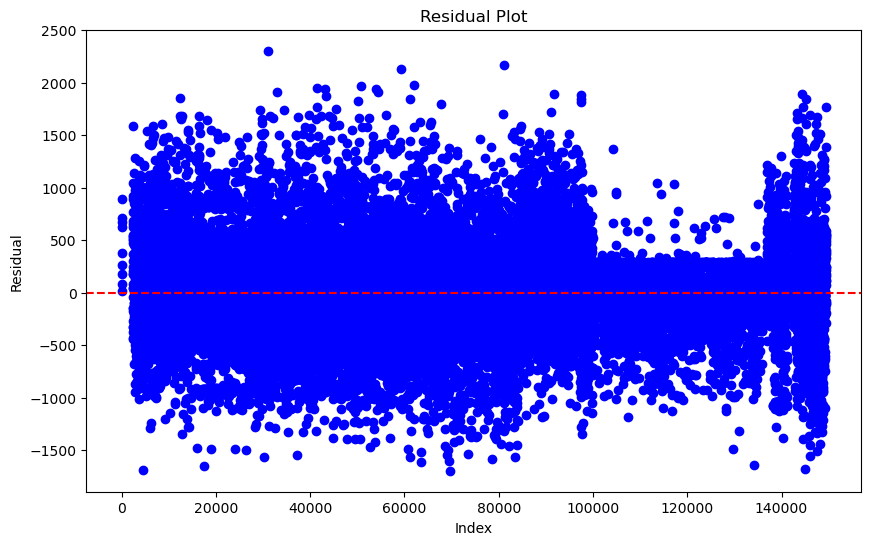

In [50]:
import matplotlib.pyplot as plt

# Assuming residual is already calculated as y_test - y_pred
plt.figure(figsize=(10, 6))
plt.plot(residual, marker='o', linestyle='', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.show()


## *SINCE THERE IS A PATTERN IN THE RESIDUAL PLOT WITH NO RANDOM DISTRIBUTIONS AND VARYING HETEROSCEDASTICITY WE MAY NEED TO USE ANOTHER MORE NON LINEAR MODEL FOR PREDICTION*

In [51]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.321e+09, tolerance: 1.400e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [52]:
y_pred1= lasso.predict(x_test)

In [53]:
y_pred1
mae1=mean_absolute_error(y_test,y_pred)
print(mae1)

247.84352270838687


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

In [55]:
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [56]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    # 'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(x_train_split, y_train_split)
    
    # Make predictions
    y_pred = model.predict(x_test_split)
    
    # Calculate performance metric (Mean Absolute Error)
    mae = mean_absolute_error(y_test_split, y_pred)
    
    print(f"{name} Mean Absolute Error: {mae:.4f}")

Linear Regression Mean Absolute Error: 244.0075
Decision Tree Mean Absolute Error: 221.1023
Random Forest Mean Absolute Error: 181.6854
K-Nearest Neighbors Mean Absolute Error: 200.3865


In [57]:
import pickle
third_model = list(models.values())[2]
print(third_model)
with open ("Random_forest_texas_salary_predictor.pkl","wb") as f:
    pickle.dump(third_model, f)

RandomForestRegressor()


## RANDOM FOREST IS THE BEST MODEL WITH LOW MEAN ABSOLUTE ERROR

In [59]:
df=pd.read_csv(r"extracted_files/salary.csv",low_memory=False)
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [60]:
import pandas as pd
Q1 = df['ANNUAL'].quantile(0.25)
Q3 = df['ANNUAL'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
salary_outliers = df[(df['ANNUAL'] < lower_bound) | (df['ANNUAL'] > upper_bound)]
print("Persons with salary outliers:")
print(salary_outliers[[ 'LAST NAME', 'FIRST NAME']])


Persons with salary outliers:
                             LAST NAME                      FIRST NAME
0       RUCKER                          MORTON                        
2       SPECIA JR                       JOHN                          
5       ROGERS                          SHAUNA                        
7       SPINKS                          DARREL                        
36      BARNETT                         ANNA                          
...                                ...                             ...
149374  KOCH                            MARGARET                      
149393  MEDINA                          JOE                           
149401  NUNN                            CHRISTOPHER                   
149415  PROVINE                         CYNTHIA                       
149475  WELSH                           RODERICK                      

[9031 rows x 2 columns]


## THESE ARE THE PERSONS WITH SALARY OUTLIERS

In [61]:
salary_outliers['CLASS TITLE'].astype(str).str[0]

0         J
2         J
5         D
7         D
36        L
         ..
149374    D
149393    M
149401    M
149415    D
149475    E
Name: CLASS TITLE, Length: 9031, dtype: object

In [62]:
managers = salary_outliers[salary_outliers['CLASS TITLE'].str.contains('Manager|Director|Chief', case=False)]
employees = salary_outliers[~salary_outliers['CLASS TITLE'].str.contains('Manager|Director|Chief', case=False)]
for manager, employee in zip(managers['LAST NAME'], employees['LAST NAME']):
    print(f"The managers are:{manager}  The employees are:{employee}")

The managers are:ROGERS                          The employees are:RUCKER                        
The managers are:SPINKS                          The employees are:SPECIA JR                     
The managers are:NELSON                          The employees are:BARNETT                       
The managers are:FIERRO                          The employees are:CLARK                         
The managers are:MARTINEZ                        The employees are:CLEMENTS                      
The managers are:RAFF                            The employees are:COTERA                        
The managers are:SPEIGHT                         The employees are:CRABTREE                      
The managers are:WINGFIELD                       The employees are:DOWLING                       
The managers are:ARCHER                          The employees are:ELKINS                        
The managers are:CALHOUN                         The employees are:ESPARZA                       
The managers are:EDG

## THESE ARE THE EMPLOYEES AND MANAGERS WHOSE SALARY ARE OULIERS

In [63]:
for manager, employee in zip(managers['AGENCY NAME'], employees['AGENCY NAME']):
        print(manager,employee)


OFFICE OF THE ATTORNEY GENERAL                     COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION 
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL          COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION 
LEGISLATIVE BUDGET BOARD                           SENATE                                            
TEXAS FACILITIES COMMISSION                        SENATE                                            
TEXAS FACILITIES COMMISSION                        SENATE                                            
TEXAS FACILITIES COMMISSION                        SENATE                                            
TEXAS FACILITIES COMMISSION                        SENATE                                            
TEXAS FACILITIES COMMISSION                        SENATE                                            
TEXAS LEGISLATIVE COUNCIL                          SENATE                                            
TEXAS LEGISLATIVE COUNCIL                          SENATE                         

## Departments/roles have the biggest wage disparities between mangers and employees

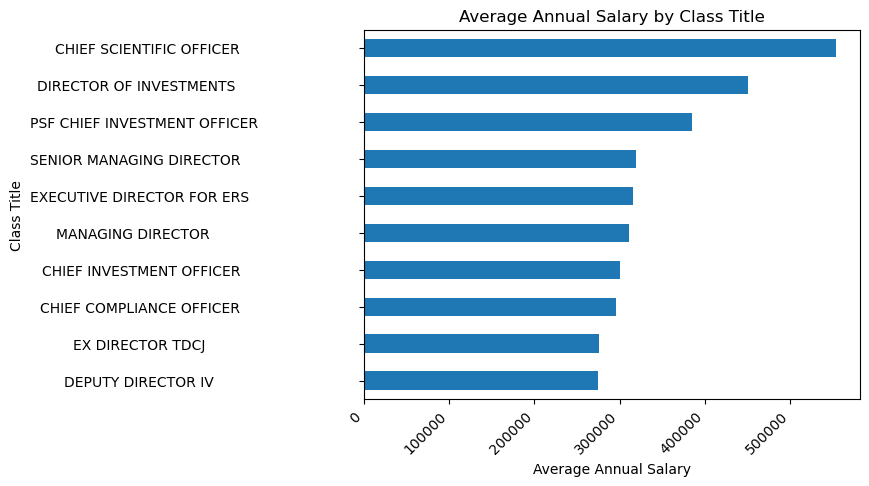

In [64]:
import matplotlib.pyplot as plt
mean_annual = df.groupby('CLASS TITLE')['ANNUAL'].mean().sort_values(ascending=False).head(10)

# Sort the values
mean_annual_sorted = mean_annual.sort_values()

# Plot the sorted values
mean_annual_sorted.plot(kind='barh')  # Horizontal bar plot is often easier to read
plt.title('Average Annual Salary by Class Title')
plt.xlabel('Average Annual Salary')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Class Title')
plt.show()

In [65]:
df['ROLE_TYPE'] = df['CLASS TITLE'].apply(lambda x: 'Manager' if 'manager' in x.lower() or 'mgr' in x.lower() else 'Employee')

avg_salaries = df.groupby(['AGENCY NAME', 'ROLE_TYPE'])['ANNUAL'].mean().unstack()

avg_salaries['WAGE_DISPARITY'] = avg_salaries['Manager'] - avg_salaries['Employee']

sorted_disparities = avg_salaries.sort_values(by='WAGE_DISPARITY', ascending=False)

print(sorted_disparities)

ROLE_TYPE                                                Employee  \
AGENCY NAME                                                         
CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS   114150.071250   
TEACHER RETIREMENT SYSTEM                            89952.002446   
EMPLOYEES RETIREMENT SYSTEM                          81715.002152   
BOARD OF NURSE EXAMINERS                             63194.071927   
STATE AUDITOR'S OFFICE                               79551.937143   
...                                                           ...   
TEXAS FUNERAL SERVICE COMMISSION                     54841.240000   
TEXAS PUBLIC FINANCE AUTHORITY                       87573.848571   
THIRD COURT OF APPEALS DISTRICT                      95583.048750   
THIRTEENTH COURT OF APPEALS DISTRICT                 99880.260000   
TWELFTH COURT OF APPEALS DISTRICT                   108816.656000   

ROLE_TYPE                                                 Manager  \
AGENCY NAME                      

In [66]:
sorted_disparities['Manager'].fillna(sorted_disparities['Manager'].median(),inplace=True)

In [67]:
sorted_disparities['Manager'].isnull().sum()

0

In [68]:
pd.set_option('display.max_rows', None)
df['ROLE_TYPE'] = df['CLASS TITLE'].apply(lambda x: 'Manager' if 'manager' in x.lower() or 'mgr' in x.lower() else 'Employee')
df['ROLE_TYPE'].value_counts()

ROLE_TYPE
Employee    142904
Manager       6577
Name: count, dtype: int64

In [69]:
avg_salaries = df.groupby([ 'ROLE_TYPE','AGENCY NAME'])['ANNUAL'].mean().unstack()
avg_salaries

AGENCY NAME,ALCOHOLIC BEVERAGE COMMISSION,BOARD OF ARCHITECTURAL EXAMINERS,BOARD OF CHIROPRACTIC EXAMINERS,BOARD OF DENTAL EXAMINERS,BOARD OF EXAMINERS OF PSYCHOLOGISTS,BOARD OF NURSE EXAMINERS,BOARD OF PHARMACY,BOARD OF PLUMBING EXAMINERS,BOARD OF PROFESSIONAL GEOSCIENTISTS,BOARD OF PROFESSIONAL LAND SURVEYING,...,TEXAS MILITARY DEPARTMENT,TEXAS PUBLIC FINANCE AUTHORITY,TEXAS RACING COMMISSION,TEXAS VETERANS COMMISSION,TEXAS WORKFORCE COMMISSION,THIRD COURT OF APPEALS DISTRICT,THIRTEENTH COURT OF APPEALS DISTRICT,TREASURY SAFEKEEPING TRUST COMPANY,TWELFTH COURT OF APPEALS DISTRICT,WATER DEVELOPMENT BOARD
ROLE_TYPE,,,,,,,,,,,,,,,,,,,,,
Employee,59256.360197,73729.072,63249.048,52842.706909,46863.136,63194.071927,55657.570000,49843.57875,71466.984,44135.25,...,52873.740000,87573.848571,56268.683636,49392.145279,46744.758851,95583.04875,99880.26,110956.616949,108816.656,71352.674789
Manager,87588.635294,97980.030,NaN,70031.760000,NaN,117027.240000,75644.262857,NaN,NaN,NaN,...,65448.538723,NaN,71751.960000,75438.405714,75099.965172,NaN,NaN,152296.490000,NaN,75036.621429


In [70]:
df.columns
# df.head(2)

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search', 'ROLE_TYPE'],
      dtype='object')

## SINCE THERE IS NO TEMPORAL DATA WE CANNOT FIND THE SALARY CHANGE OVER TIME FOR DIFFERENT JOB ROLES